# Project 2 - Classification
## Credit card default
### This notebook uses the dateset *default_credit_card_clients.xlsx*

(c) Nuno António 2022 - Rev. 1.0

## Dataset description

- **X1**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- **X2**: Gender (1 = male; 2 = female). 
- **X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- **X4**: Marital status (1 = married; 2 = single; 3 = others). 
- **X5**: Age (year). 
- **X6** - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- **X12-X17**: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- **X18-X23**: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
- **Y**: Indication if the customer defaulted in the following month (0-no, 1-yes).

For additional information on the dataset check https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719

## Work description

### Overview
<p>You should organize into groups of 3 to 5 students, where you will assume the role of a consultant. You are asked to develop a model to predict which customers are likely to default on their credit card in the following month. The bank wants to use the model the decrease operational losses.</p>
<p>Employing the CRISP-DM process model, you are expected to define, describe and explain the model built. Simultaneous, you should explain how your model can help the bank reaching its objectives.</p>

### Questions or additional informations
For any additional questions, don't hesitate to get in touch with the instructor. The instructor will also act as the bank business/project stakeholder.

## Initializations and data loading

In [21]:
# Loading packages
import pandas as pd
import numpy as np

In [22]:
# Loading the dataset and visualizing summary statistics
# use multi-level header in order for the variables to be correctly interpreted as numeric (and not as strings)
ds = pd.read_excel('default_credit_card_clients.xlsx', engine='openpyxl', header=[0,1])

## Data Understanding

In [23]:
ds.describe(include='all').T

count           mean  \
Unnamed: 0_level_0 ID                          30000.0   15000.500000   
X1                 LIMIT_BAL                   30000.0  167484.322667   
X2                 SEX                         30000.0       1.603733   
X3                 EDUCATION                   30000.0       1.853133   
X4                 MARRIAGE                    30000.0       1.551867   
X5                 AGE                         30000.0      35.485500   
X6                 PAY_0                       30000.0      -0.016700   
X7                 PAY_2                       30000.0      -0.133767   
X8                 PAY_3                       30000.0      -0.166200   
X9                 PAY_4                       30000.0      -0.220667   
X10                PAY_5                       30000.0      -0.266200   
X11                PAY_6                       30000.0      -0.291100   
X12                BILL_AMT1                   30000.0   51223.330900   
X13                BILL_AMT2                   30000.0   49179.075167   
X14                BILL_AMT3                   30000.0   47013.154800   
X15                BILL_AMT4                   30000.0   43262.948967   
X16                BILL_AMT5                   30000.0   40311.400967   
X17                BILL_AMT6                   30000.0   38871.760400   
X18                PAY_AMT1                    30000.0    5663.580500   
X19                PAY_AMT2                    30000.0    5921.163500   
X20                PAY_AMT3                    30000.0    5225.681500   
X21                PAY_AMT4                    30000.0    4826.076867   
X22                PAY_AMT5                    30000.0    4799.387633   
X23                PAY_AMT6                    30000.0    5215.502567   
Y                  default payment next month  30000.0       0.221200   

                                                         std       min  \
Unnamed: 0_level_0 ID                            8660.398374       1.0   
X1                 LIMIT_BAL                   129747.661567   10000.0   
X2                 SEX                              0.489129       1.0   
X3                 EDUCATION                        0.790349       0.0   
X4                 MARRIAGE                         0.521970       0.0   
X5                 AGE                              9.217904      21.0   
X6                 PAY_0                            1.123802      -2.0   
X7                 PAY_2                            1.197186      -2.0   
X8                 PAY_3                            1.196868      -2.0   
X9                 PAY_4                            1.169139      -2.0   
X10                PAY_5                            1.133187      -2.0   
X11                PAY_6                            1.149988      -2.0   
X12                BILL_AMT1                    73635.860576 -165580.0   
X13                BILL_AMT2                    71173.768783  -69777.0   
X14                BILL_AMT3                    69349.387427 -157264.0   
X15                BILL_AMT4                    64332.856134 -170000.0   
X16                BILL_AMT5                    60797.155770  -81334.0   
X17                BILL_AMT6                    59554.107537 -339603.0   
X18                PAY_AMT1                     16563.280354       0.0   
X19                PAY_AMT2                     23040.870402       0.0   
X20                PAY_AMT3                     17606.961470       0.0   
X21                PAY_AMT4                     15666.159744       0.0   
X22                PAY_AMT5                     15278.305679       0.0   
X23                PAY_AMT6                     17777.465775       0.0   
Y                  default payment next month       0.415062       0.0   

                                                    25%       50%        75%  \
Unnamed: 0_level_0 ID                           7500.75   15000.5   22500.25   
X1                 LIMIT_BAL                   50000.00  140000.0

In [24]:
# Show top rows
ds.head()

Unnamed: 0_level_0        X1  X2        X3       X4  X5    X6    X7    X8  \
                  ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3   
0                  1     20000   2         2        1  24     2     2    -1   
1                  2    120000   2         2        2  26    -1     2     0   
2                  3     90000   2         2        2  34     0     0     0   
3                  4     50000   2         2        1  37     0     0     0   
4                  5     50000   1         2        1  57    -1     0    -1   

     X9  ...       X15       X16       X17      X18      X19      X20  \
  PAY_4  ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3   
0    -1  ...         0         0         0        0      689        0   
1     0  ...      3272      3455      3261        0     1000     1000   
2     0  ...     14331     14948     15549     1518     1500     1000   
3     0  ...     28314     28959     29547     2000     2019     1200   
4     0  ...     20940     19146     19131     2000    36681    10000   

       X21      X22      X23                          Y  
  PAY_AMT4 PAY_AMT5 PAY_AMT6 default payment next month  
0        0        0        0                          1  
1     1000        0     2000                          1  
2     1000     1000     5000                          0  
3     1100     1069     1000                          0  
4     9000      689      679                          0  

[5 rows x 25 columns]

In [25]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   (Unnamed: 0_level_0, ID)         30000 non-null  int64
 1   (X1, LIMIT_BAL)                  30000 non-null  int64
 2   (X2, SEX)                        30000 non-null  int64
 3   (X3, EDUCATION)                  30000 non-null  int64
 4   (X4, MARRIAGE)                   30000 non-null  int64
 5   (X5, AGE)                        30000 non-null  int64
 6   (X6, PAY_0)                      30000 non-null  int64
 7   (X7, PAY_2)                      30000 non-null  int64
 8   (X8, PAY_3)                      30000 non-null  int64
 9   (X9, PAY_4)                      30000 non-null  int64
 10  (X10, PAY_5)                     30000 non-null  int64
 11  (X11, PAY_6)                     30000 non-null  int64
 12  (X12, BILL_AMT1)                 30000 non-nul

In [26]:
n_obs = 30000

Observations: We have 30000 observations, with all variables being of the type numeric.

In [27]:
# Remove first header for easier manipulation
ds.columns = ds.columns.droplevel(0)
ds.head(5) # check df again

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [28]:
# Rename the Default variable column toa a simpler name
ds.rename(columns = {'default payment next month':'DEFAULT'}, inplace = True)

In [29]:
ds.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0         0         0         0        1  
1      1000         0      2000        1  
2      1000      1000      5000        0  
3      1100      1069      1000        0  
4      9000       689       679        0  

[5 rows x 25 columns]

In [30]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

Obs: No change in variables after removal of column 1st level.

### Number of Variables

In [31]:
print("The dataset has " + str(len(ds.columns)) + " variables.")

The dataset has 25 variables.


### Missing Values

In [32]:
# confirming there are no missing values
ds.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

Observations: there are no missing values.

### Visualization I

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Histograms

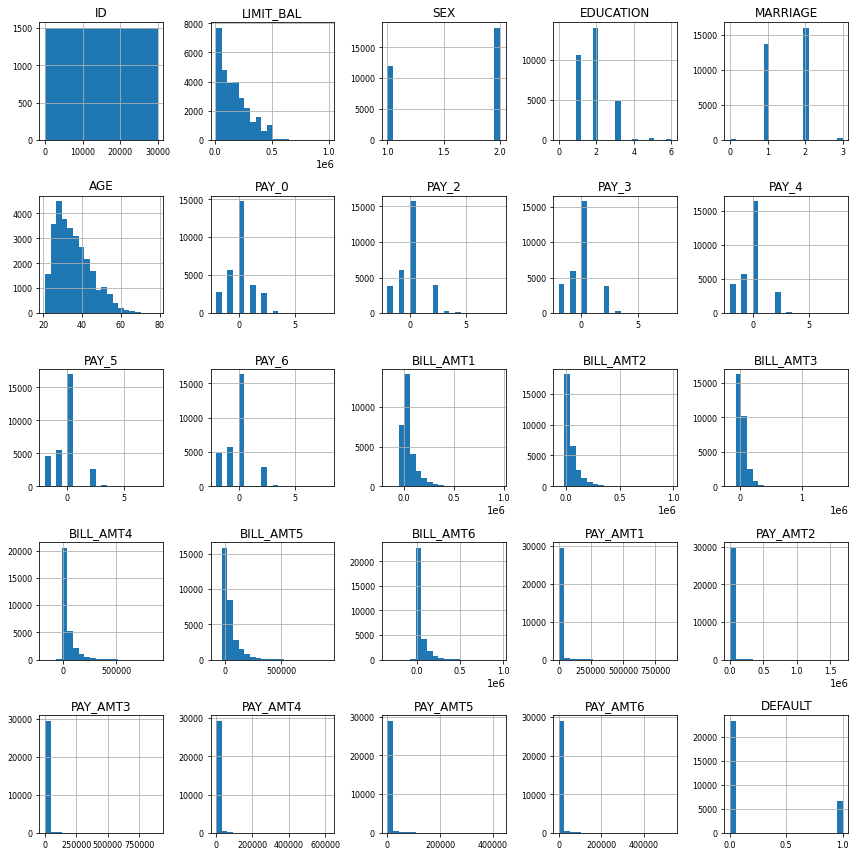

In [34]:
# plotting histograms for the numerical variables
ds.hist(bins=20, figsize=(12, 12), layout=(5, 5), xlabelsize=8, ylabelsize=8);
plt.tight_layout() # avoid overlaping of figures

#### Boxplots

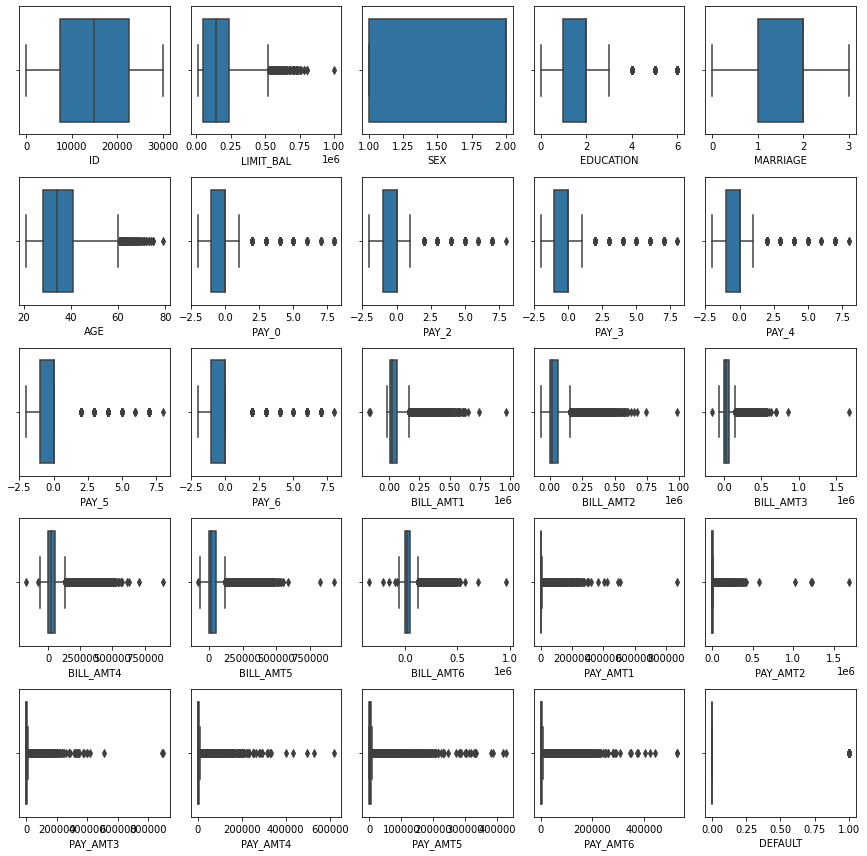

In [35]:
# code from class
# Do boxplots on all numeric variables
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
for var, subplot in zip(ds.columns, ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)
plt.tight_layout()

Observations:
- Variables EDUCATION, AGE and PAY (historic of payment status/delays) with some outliers.
- Variables BILL_AMT and PAY_AMT with a lot of outliers.

#### Correlation Matrix

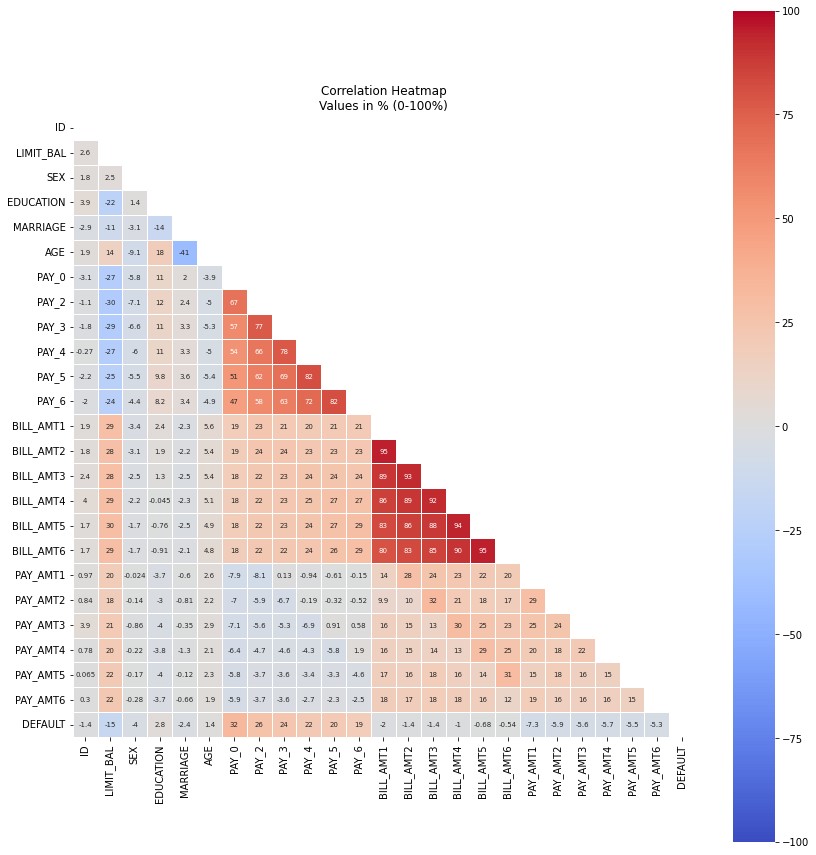

In [36]:
# adapted from code from class
corr = ds.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(12, 12))
heatmap = sns.heatmap(corr*100,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      vmin = -100,
                      vmax = 100,
                      annot = True,
                      annot_kws = {'size': 7})

#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 90)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('Correlation Heatmap\nValues in % (0-100%)')
plt.tight_layout() # avoid overlaping of axis labels

Observations:
- In general, variables are not very highly correlated, except for the temporal variables between themselves, wich makes sense (they present some for of autocorrelation).
- Also age presents a negative correlation coefficient of -41% with the marriage variable, which is moderate and makes sense (higher age is correlated with being married).

### Value Counts

In [37]:
# display value counts in absolute and in relative value for each variable
for var in ds.columns:
    display(pd.concat([pd.DataFrame(ds[var].value_counts()),
                       pd.DataFrame(ds[var].value_counts(normalize=True))], axis=1))
    #display(pd.DataFrame(ds[var].value_counts(normalize=True)))
    #print(var,":\n",ds[var].value_counts(), sep="")
    print()

ID        ID
1       1  0.000033
19997   1  0.000033
20009   1  0.000033
20008   1  0.000033
20007   1  0.000033
...    ..       ...
9996    1  0.000033
9995    1  0.000033
9994    1  0.000033
9993    1  0.000033
30000   1  0.000033

[30000 rows x 2 columns]

LIMIT_BAL  LIMIT_BAL
50000         3365   0.112167
20000         1976   0.065867
30000         1610   0.053667
80000         1567   0.052233
200000        1528   0.050933
...            ...        ...
730000           2   0.000067
1000000          1   0.000033
327680           1   0.000033
760000           1   0.000033
690000           1   0.000033

[81 rows x 2 columns]

SEX       SEX
2  18112  0.603733
1  11888  0.396267

EDUCATION  EDUCATION
2      14030   0.467667
1      10585   0.352833
3       4917   0.163900
5        280   0.009333
4        123   0.004100
6         51   0.001700
0         14   0.000467

MARRIAGE  MARRIAGE
2     15964  0.532133
1     13659  0.455300
3       323  0.010767
0        54  0.001800

AGE       AGE
29  1605  0.053500
27  1477  0.049233
28  1409  0.046967
30  1395  0.046500
26  1256  0.041867
31  1217  0.040567
25  1186  0.039533
34  1162  0.038733
32  1158  0.038600
33  1146  0.038200
24  1127  0.037567
35  1113  0.037100
36  1108  0.036933
37  1041  0.034700
39   954  0.031800
38   944  0.031467
23   931  0.031033
40   870  0.029000
41   824  0.027467
42   794  0.026467
44   700  0.023333
43   670  0.022333
45   617  0.020567
46   570  0.019000
22   560  0.018667
47   501  0.016700
48   466  0.015533
49   452  0.015067
50   411  0.013700
51   340  0.011333
53   325  0.010833
52   304  0.010133
54   247  0.008233
55   209  0.006967
56   178  0.005933
58   122  0.004067
57   122  0.004067
59    83  0.002767
60    67  0.002233
21    67  0.002233
61    56  0.001867
62    44  0.001467
63    31  0.001033
64    31  0.001033
66    25  0.000833
65    24  0.000800
67    16  0.000533
69    15  0.000500
70    10  0.000333
68     5  0.000167
73     4  0.000133
72     3  0.000100
75     3  0.000100
71     3  0.000100
79     1  0.000033
74     1  0.000033

PAY_0     PAY_0
 0  14737  0.491233
-1   5686  0.189533
 1   3688  0.122933
-2   2759  0.091967
 2   2667  0.088900
 3    322  0.010733
 4     76  0.002533
 5     26  0.000867
 8     19  0.000633
 6     11  0.000367
 7      9  0.000300

PAY_2     PAY_2
 0  15730  0.524333
-1   6050  0.201667
 2   3927  0.130900
-2   3782  0.126067
 3    326  0.010867
 4     99  0.003300
 1     28  0.000933
 5     25  0.000833
 7     20  0.000667
 6     12  0.000400
 8      1  0.000033

PAY_3     PAY_3
 0  15764  0.525467
-1   5938  0.197933
-2   4085  0.136167
 2   3819  0.127300
 3    240  0.008000
 4     76  0.002533
 7     27  0.000900
 6     23  0.000767
 5     21  0.000700
 1      4  0.000133
 8      3  0.000100

PAY_4     PAY_4
 0  16455  0.548500
-1   5687  0.189567
-2   4348  0.144933
 2   3159  0.105300
 3    180  0.006000
 4     69  0.002300
 7     58  0.001933
 5     35  0.001167
 6      5  0.000167
 1      2  0.000067
 8      2  0.000067

PAY_5     PAY_5
 0  16947  0.564900
-1   5539  0.184633
-2   4546  0.151533
 2   2626  0.087533
 3    178  0.005933
 4     84  0.002800
 7     58  0.001933
 5     17  0.000567
 6      4  0.000133
 8      1  0.000033

PAY_6     PAY_6
 0  16286  0.542867
-1   5740  0.191333
-2   4895  0.163167
 2   2766  0.092200
 3    184  0.006133
 4     49  0.001633
 7     46  0.001533
 6     19  0.000633
 5     13  0.000433
 8      2  0.000067

BILL_AMT1  BILL_AMT1
0            2008   0.066933
390           244   0.008133
780            76   0.002533
326            72   0.002400
316            63   0.002100
...           ...        ...
11636           1   0.000033
146034          1   0.000033
20817           1   0.000033
1351            1   0.000033
47929           1   0.000033

[22723 rows x 2 columns]

BILL_AMT2  BILL_AMT2
0           2506   0.083533
390          231   0.007700
326           75   0.002500
780           75   0.002500
316           72   0.002400
...          ...        ...
26357          1   0.000033
85195          1   0.000033
6889           1   0.000033
11004          1   0.000033
48905          1   0.000033

[22346 rows x 2 columns]

BILL_AMT3  BILL_AMT3
0            2870   0.095667
390           275   0.009167
780            74   0.002467
326            63   0.002100
316            62   0.002067
...           ...        ...
19580           1   0.000033
45129           1   0.000033
227807          1   0.000033
39330           1   0.000033
49764           1   0.000033

[22026 rows x 2 columns]

BILL_AMT4  BILL_AMT4
0            3195   0.106500
390           246   0.008200
780           101   0.003367
316            68   0.002267
326            62   0.002067
...           ...        ...
97189           1   0.000033
118839          1   0.000033
23567           1   0.000033
18377           1   0.000033
36535           1   0.000033

[21548 rows x 2 columns]

BILL_AMT5  BILL_AMT5
0           3506   0.116867
390          235   0.007833
780           94   0.003133
316           79   0.002633
326           62   0.002067
...          ...        ...
19341          1   0.000033
66726          1   0.000033
80682          1   0.000033
28508          1   0.000033
32428          1   0.000033

[21010 rows x 2 columns]

BILL_AMT6  BILL_AMT6
0            4020   0.134000
390           207   0.006900
780            86   0.002867
150            78   0.002600
316            77   0.002567
...           ...        ...
26852           1   0.000033
108660          1   0.000033
480             1   0.000033
15298           1   0.000033
15313           1   0.000033

[20604 rows x 2 columns]

PAY_AMT1  PAY_AMT1
0          5249  0.174967
2000       1363  0.045433
3000        891  0.029700
5000        698  0.023267
1500        507  0.016900
...         ...       ...
3391          1  0.000033
7785          1  0.000033
66022         1  0.000033
10121         1  0.000033
85900         1  0.000033

[7943 rows x 2 columns]

PAY_AMT2  PAY_AMT2
0          5396  0.179867
2000       1290  0.043000
3000        857  0.028567
5000        717  0.023900
1000        594  0.019800
...         ...       ...
7866          1  0.000033
6206          1  0.000033
10529         1  0.000033
21300         1  0.000033
3526          1  0.000033

[7899 rows x 2 columns]

PAY_AMT3  PAY_AMT3
0          5968  0.198933
2000       1285  0.042833
1000       1103  0.036767
3000        870  0.029000
5000        721  0.024033
...         ...       ...
5102          1  0.000033
5368          1  0.000033
28138         1  0.000033
549           1  0.000033
25128         1  0.000033

[7518 rows x 2 columns]

PAY_AMT4  PAY_AMT4
0          6408  0.213600
1000       1394  0.046467
2000       1214  0.040467
3000        887  0.029567
5000        810  0.027000
...         ...       ...
18916         1  0.000033
3468          1  0.000033
11476         1  0.000033
4363          1  0.000033
8049          1  0.000033

[6937 rows x 2 columns]

PAY_AMT5  PAY_AMT5
0          6703  0.223433
1000       1340  0.044667
2000       1323  0.044100
3000        947  0.031567
5000        814  0.027133
...         ...       ...
9111          1  0.000033
16496         1  0.000033
4819          1  0.000033
10078         1  0.000033
52964         1  0.000033

[6897 rows x 2 columns]

PAY_AMT6  PAY_AMT6
0          7173  0.239100
1000       1299  0.043300
2000       1295  0.043167
3000        914  0.030467
5000        808  0.026933
...         ...       ...
7329          1  0.000033
6862          1  0.000033
6525          1  0.000033
11894         1  0.000033
16080         1  0.000033

[6939 rows x 2 columns]

DEFAULT  DEFAULT
0    23364   0.7788
1     6636   0.2212

### (TO DO) Cross Tables

EDUCATION  0     1     2     3   4    5   6
SEX                                        
1          8  4354  5374  1990  42   95  25
2          6  6231  8656  2927  81  185  26

MARRIAGE   0     1     2    3
SEX                          
1         14  5190  6553  131
2         40  8469  9411  192

AGE  21   22   23   24   25   26   27   28   29   30  ...  67  68  69  70  71  \
SEX                                                   ...                       
1    21  139  260  355  390  464  529  506  617  561  ...   9   3   6   4   2   
2    46  421  671  772  796  792  948  903  988  834  ...   7   2   9   6   1   

AGE  72  73  74  75  79  
SEX                      
1     2   2   0   2   1  
2     1   2   1   1   0  

[2 rows x 56 columns]

DEFAULT      0     1
SEX                 
1         9015  2873
2        14349  3763

PAY_0    -2    -1     0     1     2    3   4   5   6   7   8
SEX                                                         
1       871  2132  6031  1492  1120  159  44  18   6   5  10
2      1888  3554  8706  2196  1547  163  32   8   5   4   9

PAY_2    -2    -1     0   1     2    3   4   5   6   7   8
SEX                                                       
1      1229  2220  6467  14  1710  156  60  14   7  11   0
2      2553  3830  9263  14  2217  170  39  11   5   9   1

PAY_3    -2    -1     0   1     2    3   4   5   6   7   8
SEX                                                       
1      1352  2204  6468   4  1654  128  40  10  12  13   3
2      2733  3734  9296   0  2165  112  36  11  11  14   0

PAY_4    -2    -1     0   1     2    3   4   5   6   7   8
SEX                                                       
1      1510  2091  6730   2  1361  103  38  18   2  31   2
2      2838  3596  9725   0  1798   77  31  17   3  27   0

PAY_5    -2    -1      0     2   3   4   5   6   7   8
SEX                                                   
1      1613  2062   6888  1139  96  46   8   4  31   1
2      2933  3477  10059  1487  82  38   9   0  27   0

PAY_6    -2    -1     0     2   3   4   5   6   7   8
SEX                                                  
1      1815  2118  6612  1178  95  25   8  12  23   2
2      3080  3622  9674  1588  89  24   5   7  23   0

MARRIAGE    0     1     2    3
EDUCATION                     
0           0     4    10    0
1           4  3722  6809   50
2           6  6842  7020  162
3          44  2861  1909  103
4           0    52    68    3
5           0   150   127    3
6           0    28    21    2

AGE        21   22   23   24   25   26   27   28   29   30  ...  67  68  69  \
EDUCATION                                                   ...               
0           0    0    0    0    0    0    0    1    0    2  ...   0   0   0   
1           7  120  264  329  406  466  665  657  784  606  ...   3   1   5   
2          53  354  536  667  663  633  653  595  677  637  ...   4   3   3   
3           4   77  115  119  100  140  133  137  124  132  ...   9   1   7   
4           0    2    3    4    7    9    6    9    9    9  ...   0   0   0   
5           2    6   13    8    9    8   18    9   10    9  ...   0   0   0   
6           1    1    0    0    1    0    2    1    1    0  ...   0   0   0   

AGE        70  71  72  73  74  75  79  
EDUCATION                              
0           0   0   0   0   0   0   0  
1           4   2   0   0   0   1   1  
2           1   0   0   2   0   2   0  
3           5   1   3   2   1   0   0  
4           0   0   0   0   0   0   0  
5           0   0   0   0   0   0   0  
6           0   0   0   0   0   0   0  

[7 rows x 56 columns]

DEFAULT        0     1
EDUCATION             
0             14     0
1           8549  2036
2          10700  3330
3           3680  1237
4            116     7
5            262    18
6             43     8

PAY_0        -2    -1     0     1     2    3   4   5   6   7   8
EDUCATION                                                       
0             3     4     4     3     0    0   0   0   0   0   0
1          1368  2775  4308  1366   677   70  14   2   0   1   4
2           976  2080  7636  1676  1384  189  46  17   8   6  12
3           342   770  2520   614   580   61  16   6   3   2   3
4            29    23    55    13     3    0   0   0   0   0   0
5            35    27   181    16    18    2   0   1   0   0   0
6             6     7    33     0     5    0   0   0   0   0   0

PAY_2        -2    -1     0   1     2    3   4   5   6   7   8
EDUCATION                                                     
0             4     6     4   0     0    0   0   0   0   0   0
1          1898  2951  4584   8  1052   70  14   3   1   4   0
2          1334  2190  8135  18  2073  179  65  15   9  12   0
3           467   829  2723   2   786   77  19   7   2   4   1
4            31    35    56   0     1    0   0   0   0   0   0
5            42    31   193   0    13    0   1   0   0   0   0
6             6     8    35   0     2    0   0   0   0   0   0

PAY_3        -2    -1     0   1     2    3   4   5   6   7   8
EDUCATION                                                     
0             4     7     2   0     1    0   0   0   0   0   0
1          2033  2848  4570   2  1058   44  14   4   5   6   1
2          1451  2191  8178   2  1973  144  48  15  12  14   2
3           523   803  2732   0   779   51  14   2   6   7   0
4            31    34    57   0     1    0   0   0   0   0   0
5            36    48   189   0     6    1   0   0   0   0   0
6             7     7    36   0     1    0   0   0   0   0   0

PAY_4        -2    -1     0   1     2   3   4   5   6   7   8
EDUCATION                                                    
0             4     6     3   0     1   0   0   0   0   0   0
1          2116  2653  4892   2   854  35  13   6   1  12   1
2          1576  2158  8431   0  1671  96  44  19   2  32   1
3           573   786  2846   0   625  49  12  10   2  14   0
4            34    34    54   0     1   0   0   0   0   0   0
5            37    41   197   0     5   0   0   0   0   0   0
6             8     9    32   0     2   0   0   0   0   0   0

PAY_5        -2    -1     0     2    3   4   5   6   7   8
EDUCATION                                                 
0             4     7     3     0    0   0   0   0   0   0
1          2154  2518  5101   752   31  14   2   0  12   1
2          1701  2140  8610  1378  110  50   6   3  32   0
3           601   805  2939   491   37  20   9   1  14   0
4            35    28    59     1    0   0   0   0   0   0
5            44    29   203     4    0   0   0   0   0   0
6             7    12    32     0    0   0   0   0   0   0

PAY_6        -2    -1     0     2    3   4   5   6   7   8
EDUCATION                                                 
0             6     7     1     0    0   0   0   0   0   0
1          2209  2641  4843   828   41   6   3   2  11   1
2          1894  2204  8303  1457  106  25   6  13  21   1
3           680   816  2870   474   37  18   4   4  14   0
4            35    27    58     3    0   0   0   0   0   0
5            60    34   182     4    0   0   0   0   0   0
6            11    11    29     0    0   0   0   0   0   0

AGE       21   22   23   24    25    26    27    28    29   30  ...  67  68  \
MARRIAGE                                                        ...           
0          0    0    1    2     0     3     2     1     1    2  ...   0   0   
1          8   52   88  134   158   174   247   285   336  399  ...  13   3   
2         59  502  840  989  1023  1077  1221  1120  1261  984  ...   3   2   
3          0    6    2    2     5     2     7     3     7   10  ...   0   0   

AGE       69  70  71  72  73  74  75  79  
MARRIAGE                                  
0          0   0   0   0   0   0   0   0  
1         15   8   3   3   4   1   3   1  
2          0   2   0   0   0   0   0   0  
3          0   0   0   0   0   0   0   0  

[4 rows x 56 columns]

DEFAULT       0     1
MARRIAGE             
0            49     5
1         10453  3206
2         12623  3341
3           239    84

c:\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


PAY_0       -2    -1     0     1     2    3   4   5   6   7   8
MARRIAGE                                                       
0            7    15    20     7     4    0   0   1   0   0   0
1         1382  2759  6315  1719  1282  140  35   8   4   6   9
2         1356  2870  8217  1916  1352  175  41  17   7   3  10
3           14    42   185    46    29    7   0   0   0   0   0

PAY_2       -2    -1     0   1     2    3   4   5   6   7   8
MARRIAGE                                                     
0            8    15    22   0     8    0   1   0   0   0   0
1         1881  2958  6742  16  1846  141  46  11   7  10   1
2         1865  3030  8767  11  2029  183  50  14   5  10   0
3           28    47   199   1    44    2   2   0   0   0   0

PAY_3       -2    -1     0   1     2    3   4   5   6   7   8
MARRIAGE                                                     
0           11    13    19   0     9    2   0   0   0   0   0
1         2035  2887  6814   3  1750  107  30  13  10   9   1
2         2014  2987  8733   1  2017  127  45   8  13  17   2
3           25    51   198   0    43    4   1   0   0   1   0

PAY_4       -2    -1     0   1     2   3   4   5   6   7   8
MARRIAGE                                                    
0           12    14    19   0     9   0   0   0   0   0   0
1         2164  2798  7067   2  1473  81  30  17   1  25   1
2         2144  2829  9160   0  1643  95  39  18   4  31   1
3           28    46   209   0    34   4   0   0   0   2   0

PAY_5       -2    -1     0     2   3   4   5   6   7   8
MARRIAGE                                                
0           12    11    25     5   1   0   0   0   0   0
1         2279  2699  7316  1210  82  39   8   1  24   1
2         2227  2778  9387  1389  94  45   9   3  32   0
3           28    51   219    22   1   0   0   0   2   0

PAY_6       -2    -1     0     2   3   4   5   6   7   8
MARRIAGE                                                
0           12    14    21     6   1   0   0   0   0   0
1         2388  2816  7067  1240  91  21   6   8  21   1
2         2467  2853  8993  1490  92  27   7  10  24   1
3           28    57   205    30   0   1   0   1   1   0

DEFAULT     0    1
AGE               
21         53   14
22        391  169
23        684  247
24        827  300
25        884  302
26       1003  253
27       1164  313
28       1123  286
29       1292  313
30       1121  274
31        988  229
32        933  225
33        931  215
34        931  231
35        887  226
36        854  254
37        812  229
38        750  194
39        755  199
40        683  187
41        639  185
42        609  185
43        520  150
44        538  162
45        501  116
46        413  157
47        381  120
48        362  104
49        333  119
50        310  101
51        252   88
52        226   78
53        251   74
54        191   56
55        152   57
56        129   49
57         95   27
58         91   31
59         62   21
60         44   23
61         35   21
62         37    7
63         23    8
64         22    9
65         19    5
66         18    7
67         11    5
68          4    1
69         12    3
70          8    2
71          3    0
72          2    1
73          1    3
74          1    0
75          2    1
79          1    0

PAY_0   -2   -1    0    1    2   3   4   5   6   7   8
AGE                                                   
21       1    7   47    4    7   0   1   0   0   0   0
22      13   48  319   82   79  16   2   1   0   0   0
23      33  121  532  100  124  14   6   0   1   0   0
24      41  170  611  148  134  14   5   2   0   0   2
25      59  164  677  141  122  15   7   0   0   0   1
26      70  178  711  156  120  17   2   0   1   0   1
27     100  262  767  198  129  15   3   2   1   0   0
28     116  244  739  172  122  13   1   1   0   0   1
29     149  313  811  188  127  10   3   1   1   1   1
30     136  291  681  161  104  17   4   0   1   0   0
31     140  240  566  161   83  21   2   2   0   1   1
32     126  223  584  144   66  11   1   2   1   0   0
33     126  230  560  139   83   5   2   1   0   0   0
34     135  238  535  152   97   5   0   0   0   0   0
35     111  230  529  145   82  11   3   0   1   0   1
36     133  251  467  143   99  11   2   0   0   0   2
37     124  232  457  126   86  10   3   3   0   0   0
38     112  207  417  115   80   8   2   1   0   1   1
39      96  206  440  118   76  13   2   1   0   1   1
40      96  193  401   99   71   7   0   0   0   1   2
41      91  170  393   93   67   6   1   1   0   1   1
42      76  167  363   91   82   8   2   3   0   1   1
43      74  152  299   76   59   5   3   1   0   1   0
44      77  144  326   80   62   4   5   1   0   0   1
45      55  131  301   79   44   5   2   0   0   0   0
46      57  113  268   71   48   9   2   0   1   0   1
47      56  109  215   65   49   4   2   0   1   0   0
48      47   92  236   46   41   4   0   0   0   0   0
49      48   88  207   66   40   2   0   1   0   0   0
50      43   86  190   42   45   4   0   0   0   1   0
51      30   58  176   41   31   3   0   1   0   0   0
52      26   43  147   47   36   4   1   0   0   0   0
53      37   60  160   34   29   4   1   0   0   0   0
54      28   45  116   27   24   4   2   0   1   0   0
55      14   34  107   21   26   7   0   0   0   0   0
56      12   24   97   25   13   6   0   1   0   0   0
57      12   30   58   10   10   1   1   0   0   0   0
58      21   25   36   21   17   1   1   0   0   0   0
59       7   10   37   14   11   2   2   0   0   0   0
60       6   13   28   11    7   1   0   0   0   0   1
61       3    8   22   11    7   5   0   0   0   0   0
62       3    5   24    5    6   0   0   0   1   0   0
63       4    9   12    3    3   0   0   0   0   0   0
64       3    5   14    4    5   0   0   0   0   0   0
65       3    4   12    4    1   0   0   0   0   0   0
66       2    5   14    3    1   0   0   0   0   0   0
67       1    1    5    3    6   0   0   0   0   0   0
68       1    0    3    0    1   0   0   0   0   0   0
69       2    2    8    1    2   0   0   0   0   0   0
70       0    3    4    1    2   0   0   0   0   0   0
71       0    0    3    0    0   0   0   0   0   0   0
72       1    1    0    0    1   0   0   0   0   0   0
73       2    1    1    0    0   0   0   0   0   0   0
74       0    0    1    0    0   0   0   0   0   0   0
75       0    0    2    1    0   0   0   0   0   0   0
79       0    0    1    0    0   0   0   0   0   0   0

PAY_2   -2   -1    0   1    2   3   4   5   6   7   8
AGE                                                  
21       2    6   52   0    5   2   0   0   0   0   0
22      18   55  342   1  126  10   7   1   0   0   0
23      46  116  596   0  148  19   4   2   0   0   0
24      69  169  674   2  186  19   5   0   0   2   1
25      90  178  718   0  171  23   3   2   0   1   0
26     104  190  761   1  170  21   5   3   0   1   0
27     161  278  825   2  189  16   4   1   1   0   0
28     161  263  778   1  190  12   2   0   1   1   0
29     199  323  863   2  201  11   3   1   1   1   0
30     176  307  725   3  166  13   3   2   0   0   0
31     195  265  593   1  142  12   5   2   1   1   0
32     171  224  620   1  128  11   2   1   0   0   0
33     168  252  588   1  128   6   3   0   0   0   0
34     188  245  569   1  151   7   1   0   0   0   0
35     158  238  564   0  140   8   2   1   1   1   0
36     184  260  511   0  139  10   2   0   0   2   0
37     163  245  491   2  129   4   7   0   0   0   0
38     154  223  447   0  107   7   3   1   1   1   0
39     135  222  469   1  111  12   2   0   1   1   0
40     124  210  423   1   99   8   2   0   1   2   0
41     109  182  410   1  108   9   3   0   1   1   0
42     109  178  393   2   98   7   5   0   1   1   0
43     101  157  321   0   77  11   2   0   1   0   0
44      94  166  341   0   86   9   3   0   0   1   0
45      74  141  322   2   69   8   1   0   0   0   0
46      68  120  277   0   92   9   1   2   0   1   0
47      76  112  228   0   75   8   1   1   0   0   0
48      59  103  243   0   54   5   2   0   0   0   0
49      68  104  222   0   57   0   1   0   0   0   0
50      51   91  209   1   52   3   1   2   1   0   0
51      43   78  178   0   37   2   2   0   0   0   0
52      37   46  158   0   59   2   1   1   0   0   0
53      47   66  170   2   33   3   4   0   0   0   0
54      37   45  122   0   34   6   2   1   0   0   0
55      19   36  115   0   35   3   1   0   0   0   0
56      18   28  104   0   24   2   1   0   0   1   0
57      17   27   64   0   13   1   0   0   0   0   0
58      23   26   42   0   29   2   0   0   0   0   0
59      11   11   41   0   18   0   2   0   0   0   0
60      10   15   29   0   10   2   0   0   0   1   0
61      10    9   25   0   11   0   1   0   0   0   0
62       6    6   25   0    5   1   0   1   0   0   0
63       6    7   12   0    5   1   0   0   0   0   0
64       5    6   15   0    4   1   0   0   0   0   0
65       4    7   12   0    1   0   0   0   0   0   0
66       4    5   14   0    2   0   0   0   0   0   0
67       2    2    5   0    7   0   0   0   0   0   0
68       1    0    3   0    1   0   0   0   0   0   0
69       2    3    7   0    3   0   0   0   0   0   0
70       1    2    5   0    2   0   0   0   0   0   0
71       0    0    3   0    0   0   0   0   0   0   0
72       1    1    1   0    0   0   0   0   0   0   0
73       2    0    2   0    0   0   0   0   0   0   0
74       0    0    1   0    0   0   0   0   0   0   0
75       1    1    1   0    0   0   0   0   0   0   0
79       0    0    1   0    0   0   0   0   0   0   0

PAY_3   -2   -1    0   1    2   3   4   5   6   7   8
AGE                                                  
21       2    6   48   0   10   1   0   0   0   0   0
22      25   49  347   0  128   8   2   1   0   0   0
23      67  116  584   0  142  12   6   0   0   4   0
24      83  168  676   0  172  16   4   1   3   4   0
25      94  167  719   0  176  18  10   0   1   1   0
26     125  193  742   0  182   9   3   0   1   1   0
27     171  277  836   0  181   9   1   2   0   0   0
28     174  263  773   0  184   9   2   1   2   1   0
29     212  332  852   1  192   9   3   1   2   1   0
30     189  300  713   0  178   8   6   0   0   1   0
31     195  269  595   0  139   9   5   2   1   2   0
32     183  213  641   1  113   5   2   0   0   0   0
33     179  249  593   0  113   9   0   1   0   0   2
34     184  253  560   0  160   3   2   0   0   0   0
35     170  232  568   0  133   6   2   1   1   0   0
36     200  247  500   0  147   7   3   0   2   2   0
37     164  238  519   1  107  10   2   0   0   0   0
38     168  207  457   0   99   9   2   1   1   0   0
39     151  224  468   0  105   3   0   2   1   0   0
40     138  191  440   0   88   8   1   2   2   0   0
41     120  178  416   0  100   7   0   1   1   1   0
42     115  178  392   1   97   6   2   2   1   0   0
43     112  147  325   0   79   4   0   1   0   2   0
44     108  160  333   0   90   5   2   0   1   1   0
45      83  139  324   0   65   4   2   0   0   0   0
46      69  130  277   0   86   5   2   0   1   0   0
47      74  121  226   0   72   6   1   0   0   0   1
48      63  100  239   0   58   4   1   0   0   1   0
49      78   91  222   0   58   2   1   0   0   0   0
50      59   94  196   0   54   4   2   1   0   1   0
51      49   68  185   0   35   3   0   0   0   0   0
52      38   43  162   0   55   3   1   0   0   2   0
53      48   72  161   0   40   3   1   0   0   0   0
54      39   39  127   0   37   4   1   0   0   0   0
55      20   34  121   0   27   4   1   0   0   2   0
56      20   28   98   0   29   2   0   0   1   0   0
57      22   29   60   0   11   0   0   0   0   0   0
58      23   24   49   0   26   0   0   0   0   0   0
59      13    9   46   0   11   2   1   1   0   0   0
60       9   14   30   0   11   2   0   0   1   0   0
61      14    9   27   0    5   1   0   0   0   0   0
62       6    5   27   0    5   0   1   0   0   0   0
63       5    7   13   0    5   0   1   0   0   0   0
64       5    7   15   0    4   0   0   0   0   0   0
65       4    6   13   0    1   0   0   0   0   0   0
66       4    4   13   0    4   0   0   0   0   0   0
67       2    2    8   0    3   1   0   0   0   0   0
68       1    0    4   0    0   0   0   0   0   0   0
69       3    3    8   0    1   0   0   0   0   0   0
70       1    1    7   0    1   0   0   0   0   0   0
71       0    0    3   0    0   0   0   0   0   0   0
72       1    1    1   0    0   0   0   0   0   0   0
73       2    0    2   0    0   0   0   0   0   0   0
74       0    0    1   0    0   0   0   0   0   0   0
75       1    1    1   0    0   0   0   0   0   0   0
79       0    0    1   0    0   0   0   0   0   0   0

PAY_4   -2   -1    0   1    2   3   4   5   6   7   8
AGE                                                  
21       5    5   49   0    8   0   0   0   0   0   0
22      27   56  386   0   81   7   2   0   0   1   0
23      72  106  615   0  120  10   1   1   0   6   0
24      90  161  703   0  151   9   4   3   2   4   0
25      99  169  759   0  136  12   7   2   1   1   0
26     129  196  767   0  150   8   2   1   0   2   1
27     184  262  867   0  150   8   3   2   0   1   0
28     197  244  798   0  158   1   3   4   0   4   0
29     238  304  888   0  158   8   6   1   1   1   0
30     206  285  741   0  145  10   4   0   1   3   0
31     205  252  629   0  111  12   4   1   0   3   0
32     196  199  647   1  108   5   1   0   0   1   0
33     189  237  621   0   93   1   1   0   0   4   0
34     183  262  581   0  129   4   3   0   0   0   0
35     180  240  578   0  108   5   1   1   0   0   0
36     213  224  544   0  110   5   3   4   0   5   0
37     165  229  548   0   91   5   1   0   0   2   0
38     176  197  481   0   82   4   3   1   0   0   0
39     154  213  478   0  104   2   1   2   0   0   0
40     151  188  450   0   69   8   2   2   0   0   0
41     120  171  441   0   83   4   1   1   0   3   0
42     130  157  412   1   86   4   2   2   0   0   0
43     112  146  347   0   59   2   2   0   0   2   0
44     121  145  353   0   72   4   1   1   0   3   0
45      91  122  339   0   60   4   1   0   0   0   0
46      75  107  303   0   75   8   1   1   0   0   0
47      81  116  238   0   62   3   0   0   0   0   1
48      70   99  246   0   45   3   1   0   0   2   0
49      75  100  227   0   48   1   1   0   0   0   0
50      57   97  198   0   52   4   1   1   0   1   0
51      50   67  184   0   37   1   0   0   0   1   0
52      41   49  170   0   37   3   1   0   0   3   0
53      57   67  166   0   31   3   0   0   0   1   0
54      39   40  133   0   29   4   1   1   0   0   0
55      20   32  130   0   21   2   1   0   0   3   0
56      25   27  100   0   23   2   0   1   0   0   0
57      21   26   64   0   10   1   0   0   0   0   0
58      30   20   50   0   22   0   0   0   0   0   0
59      12   11   45   0   11   1   2   1   0   0   0
60      10   11   36   0    8   0   0   1   0   1   0
61      14   10   26   0    6   0   0   0   0   0   0
62       8    5   27   0    3   1   0   0   0   0   0
63       5    8   14   0    3   0   1   0   0   0   0
64       5    5   18   0    3   0   0   0   0   0   0
65       5    7   11   0    1   0   0   0   0   0   0
66       4    6   12   0    3   0   0   0   0   0   0
67       2    1    9   0    3   1   0   0   0   0   0
68       1    0    4   0    0   0   0   0   0   0   0
69       3    3    8   0    1   0   0   0   0   0   0
70       1    0    8   0    1   0   0   0   0   0   0
71       0    0    2   0    1   0   0   0   0   0   0
72       1    1    1   0    0   0   0   0   0   0   0
73       2    0    1   0    1   0   0   0   0   0   0
74       0    1    0   0    0   0   0   0   0   0   0
75       1    1    1   0    0   0   0   0   0   0   0
79       0    0    1   0    0   0   0   0   0   0   0

PAY_5   -2   -1    0    2   3   4   5   6   7   8
AGE                                              
21       7   10   48    2   0   0   0   0   0   0
22      32   52  404   62   7   2   0   0   1   0
23      73  109  624  108   6   4   1   1   5   0
24      91  165  711  135  10   9   2   0   4   0
25     118  162  762  118  14  10   1   0   1   0
26     134  207  767  137   7   1   0   0   3   0
27     201  242  881  138   8   5   1   0   1   0
28     202  262  812  120   4   3   2   0   4   0
29     245  261  937  144  11   5   0   1   1   0
30     208  287  768  119   5   3   1   0   4   0
31     216  255  635   96   9   2   1   0   3   0
32     198  197  658  103   0   0   1   0   1   0
33     193  214  657   74   4   0   0   2   2   0
34     195  253  603  106   4   0   1   0   0   0
35     188  230  598   92   3   1   0   0   1   0
36     211  233  561   85   7   6   0   0   5   0
37     170  216  579   72   1   1   0   0   2   0
38     183  192  490   72   5   2   0   0   0   0
39     166  207  497   76   4   3   1   0   0   0
40     156  187  456   61   8   2   0   0   0   0
41     136  156  454   67   7   1   0   0   3   0
42     132  163  424   68   3   4   0   0   0   0
43     116  130  366   49   6   1   0   0   2   0
44     120  142  374   53   4   4   0   0   3   0
45     101  130  337   45   1   1   2   0   0   0
46      85  112  305   60   7   1   0   0   0   0
47      88  101  253   57   1   0   0   0   0   1
48      73   93  259   34   3   0   2   0   2   0
49      84   97  239   30   1   1   0   0   0   0
50      65   89  205   45   5   1   0   0   1   0
51      50   58  198   30   3   0   0   0   1   0
52      43   46  182   26   3   1   0   0   3   0
53      59   69  176   18   2   0   0   0   1   0
54      40   37  140   24   3   2   1   0   0   0
55      23   27  134   18   3   1   0   0   3   0
56      23   29  103   19   3   1   0   0   0   0
57      20   22   70    8   2   0   0   0   0   0
58      31   20   53   17   1   0   0   0   0   0
59      11   14   42   12   2   2   0   0   0   0
60      11   12   38    4   0   1   0   0   1   0
61      14    8   28    5   1   0   0   0   0   0
62       7    8   24    5   0   0   0   0   0   0
63       5    8   15    2   0   1   0   0   0   0
64       3    6   21    1   0   0   0   0   0   0
65       5    7   11    1   0   0   0   0   0   0
66       3    6   13    2   0   1   0   0   0   0
67       2    1    9    3   0   1   0   0   0   0
68       0    1    4    0   0   0   0   0   0   0
69       3    3    8    1   0   0   0   0   0   0
70       2    0    8    0   0   0   0   0   0   0
71       0    0    3    0   0   0   0   0   0   0
72       1    1    0    1   0   0   0   0   0   0
73       2    0    1    1   0   0   0   0   0   0
74       0    1    0    0   0   0   0   0   0   0
75       1    1    1    0   0   0   0   0   0   0
79       0    0    1    0   0   0   0   0   0   0

PAY_6   -2   -1    0    2   3   4   5   6   7   8
AGE                                              
21      14    9   44    0   0   0   0   0   0   0
22      53   53  371   72   7   2   1   0   1   0
23      94  102  599  120   7   1   2   4   2   0
24     112  174  671  146  15   5   0   0   4   0
25     151  161  730  121  16   6   0   1   0   0
26     150  208  751  133   8   3   0   2   1   0
27     221  252  844  144  11   4   0   0   1   0
28     224  256  791  123   7   4   0   0   4   0
29     255  294  896  147   7   4   0   2   0   0
30     224  312  718  129   5   3   0   0   3   1
31     234  260  609  103   5   1   2   0   3   0
32     209  213  624  107   3   0   0   1   1   0
33     200  228  618   92   3   0   2   2   1   0
34     216  241  601   99   4   0   1   0   0   0
35     194  222  599   91   6   0   0   1   0   0
36     211  256  529   97  10   0   0   1   4   0
37     179  218  566   73   3   0   0   0   2   0
38     189  205  459   87   4   0   0   0   0   0
39     180  205  484   76   7   1   1   0   0   0
40     170  183  437   73   7   0   0   0   0   0
41     136  174  435   71   5   0   0   0   3   0
42     133  165  414   72   9   1   0   0   0   0
43     121  142  347   53   4   0   0   1   2   0
44     130  148  358   56   4   1   0   1   2   0
45     109  127  329   48   2   1   0   1   0   0
46      99  116  296   50   6   1   2   0   0   0
47      94  111  240   53   1   0   1   0   0   1
48      73  114  244   29   2   2   0   0   2   0
49      87   94  236   34   0   1   0   0   0   0
50      74   82  202   50   2   0   0   0   1   0
51      59   60  183   36   0   0   0   1   1   0
52      47   53  175   23   3   0   0   0   3   0
53      53   70  175   26   0   0   0   0   1   0
54      38   43  135   28   2   1   0   0   0   0
55      26   25  129   24   0   2   0   0   3   0
56      21   32  104   16   3   1   1   0   0   0
57      16   28   69    7   2   0   0   0   0   0
58      26   26   54   16   0   0   0   0   0   0
59      13   12   43   12   2   1   0   0   0   0
60      11   14   34    5   2   0   0   0   1   0
61      13    9   30    3   0   1   0   0   0   0
62       8    7   21    8   0   0   0   0   0   0
63       5    9   14    2   0   1   0   0   0   0
64       2   10   18    1   0   0   0   0   0   0
65       5    6   12    1   0   0   0   0   0   0
66       3    4   14    3   0   1   0   0   0   0
67       2    2    8    3   0   0   0   1   0   0
68       0    1    4    0   0   0   0   0   0   0
69       4    2    9    0   0   0   0   0   0   0
70       3    0    7    0   0   0   0   0   0   0
71       0    0    3    0   0   0   0   0   0   0
72       1    0    0    2   0   0   0   0   0   0
73       2    0    1    1   0   0   0   0   0   0
74       0    1    0    0   0   0   0   0   0   0
75       1    1    1    0   0   0   0   0   0   0
79       0    0    1    0   0   0   0   0   0   0

PAY_0      -2    -1      0     1     2    3   4   5   6   7   8
DEFAULT                                                        
0        2394  4732  12849  2436   823   78  24  13   5   2   8
1         365   954   1888  1252  1844  244  52  13   6   7  11

PAY_2      -2    -1      0   1     2    3   4   5   6   7   8
DEFAULT                                                      
0        3091  5084  13227  23  1743  125  49  10   3   8   1
1         691   966   2503   5  2184  201  50  15   9  12   0

PAY_3      -2    -1      0   1     2    3   4   5   6   7   8
DEFAULT                                                      
0        3328  5012  13013   3  1850  102  32   9   9   5   1
1         757   926   2751   1  1969  138  44  12  14  22   2

PAY_4      -2    -1      0   1     2    3   4   5   6   7   8
DEFAULT                                                      
0        3511  4783  13439   1  1506   70  23  17   3  10   1
1         837   904   3016   1  1653  110  46  18   2  48   1

PAY_5      -2    -1      0     2    3   4   5   6   7   8
DEFAULT                                                  
0        3651  4642  13752  1203   65  33   7   1  10   0
1         895   897   3195  1423  113  51  10   3  48   1

PAY_6      -2    -1      0     2    3   4   5   6   7   8
DEFAULT                                                  
0        3914  4765  13217  1365   66  18   6   5   8   0
1         981   975   3069  1401  118  31   7  14  38   2

PAY_2    -2    -1      0   1     2    3   4   5   6   7   8
PAY_0                                                      
-2     2561   193      0   0     5    0   0   0   0   0   0
-1        0  4641    603   0   387   47   5   3   0   0   0
 0        0   478  14259   0     0    0   0   0   0   0   0
 1     1221   612      3  28  1672  109  32   7   2   1   1
 2        0   126    865   0  1591   71  14   0   0   0   0
 3        0     0      0   0   272   41   8   1   0   0   0
 4        0     0      0   0     0   58  15   3   0   0   0
 5        0     0      0   0     0    0  25   0   1   0   0
 6        0     0      0   0     0    0   0  11   0   0   0
 7        0     0      0   0     0    0   0   0   9   0   0
 8        0     0      0   0     0    0   0   0   0  19   0

PAY_3    -2    -1      0   1     2   3   4   5   6   7   8
PAY_0                                                     
-2     2401   271     55   0    32   0   0   0   0   0   0
-1      402  4010    821   0   435  14   4   0   0   0   0
 0      239   763  12845   0   858  27   4   1   0   0   0
 1      988   759    857   4   976  80  15   4   2   2   1
 2       55   130   1130   0  1233  62  25   4   2  25   1
 3        0     5     56   0   231  22   6   1   0   0   1
 4        0     0      0   0    54  12   9   1   0   0   0
 5        0     0      0   0     0  23   2   1   0   0   0
 6        0     0      0   0     0   0  11   0   0   0   0
 7        0     0      0   0     0   0   0   9   0   0   0
 8        0     0      0   0     0   0   0   0  19   0   0

PAY_4    -2    -1      0   1     2   3   4   5   6   7   8
PAY_0                                                     
-2     2310   287    133   0    29   0   0   0   0   0   0
-1      534  3628   1278   0   237   7   2   0   0   0   0
 0      450   916  12433   0   897  33   6   1   1   0   0
 1      972   709   1206   2   738  38  12   6   2   2   1
 2       74   136   1277   0  1071  57  20   4   2  25   1
 3        8     9    101   0   133  24  13   4   0  30   0
 4        0     2     27   0    32   9   4   1   0   1   0
 5        0     0      0   0    22   2   2   0   0   0   0
 6        0     0      0   0     0  10   1   0   0   0   0
 7        0     0      0   0     0   0   9   0   0   0   0
 8        0     0      0   0     0   0   0  19   0   0   0

PAY_5    -2    -1      0    2   3   4   5   6   7   8
PAY_0                                                
-2     2261   266    207   24   0   1   0   0   0   0
-1      604  3315   1605  151  10   1   0   0   0   0
 0      629  1096  12214  759  28   7   3   0   1   0
 1      942   707   1365  618  35  14   3   1   3   0
 2       99   137   1392  922  58  28   4   2  24   1
 3       10    16    121  101  26  11   7   1  29   0
 4        1     1     32   31   7   3   0   0   1   0
 5        0     1     11   10   4   0   0   0   0   0
 6        0     0      0   10   1   0   0   0   0   0
 7        0     0      0    0   9   0   0   0   0   0
 8        0     0      0    0   0  19   0   0   0   0

PAY_6    -2    -1      0    2   3   4   5   6   7   8
PAY_0                                                
-2     2205   299    232   20   3   0   0   0   0   0
-1      722  3333   1421  195  12   0   2   1   0   0
 0      878  1191  11704  923  29   6   2   4   0   0
 1      955   731   1369  580  40   7   3   2   0   1
 2      115   161   1390  898  53  20   2   8  19   1
 3       15    21    116   98  23  15   4   4  26   0
 4        2     4     33   31   4   1   0   0   1   0
 5        3     0     13    9   1   0   0   0   0   0
 6        0     0      8    3   0   0   0   0   0   0
 7        0     0      0    9   0   0   0   0   0   0
 8        0     0      0    0  19   0   0   0   0   0

PAY_3    -2    -1      0   1     2   3   4   5   6   7   8
PAY_2                                                     
-2     3377   401      1   0     3   0   0   0   0   0   0
-1      402  4673    571   0   385  19   0   0   0   0   0
 0      239   548  14074   0   837  27   4   1   0   0   0
 1       12     9      1   4     2   0   0   0   0   0   0
 2       55   307   1117   0  2302  88  22   6   2  25   3
 3        0     0      0   0   290  24   9   1   1   1   0
 4        0     0      0   0     0  82  16   1   0   0   0
 5        0     0      0   0     0   0  25   0   0   0   0
 6        0     0      0   0     0   0   0  12   0   0   0
 7        0     0      0   0     0   0   0   0  20   0   0
 8        0     0      0   0     0   0   0   0   0   1   0

PAY_4    -2    -1      0   1     2   3   4   5   6   7   8
PAY_2                                                     
-2     3118   498    124   0    41   1   0   0   0   0   0
-1      630  3997   1185   0   236   1   1   0   0   0   0
 0      457   845  13357   0  1025  37   7   1   1   0   0
 1       12     3      7   2     4   0   0   0   0   0   0
 2      131   321   1677   0  1608  88  33   9   2  57   1
 3        0    23    105   0   167  19   7   3   1   1   0
 4        0     0      0   0    78  13   7   1   0   0   0
 5        0     0      0   0     0  21   2   1   0   0   1
 6        0     0      0   0     0   0  12   0   0   0   0
 7        0     0      0   0     0   0   0  20   0   0   0
 8        0     0      0   0     0   0   0   0   1   0   0

PAY_5    -2    -1      0     2   3   4   5   6   7   8
PAY_2                                                 
-2     2986   512    236    45   2   1   0   0   0   0
-1      746  3625   1569   107   3   0   0   0   0   0
 0      646  1059  13063   914  37   7   3   0   1   0
 1       10     5      9     4   0   0   0   0   0   0
 2      155   316   1901  1352  93  42   9   4  54   1
 3        3    21    140   133  17   6   4   0   2   0
 4        0     1     29    50  13   6   0   0   0   0
 5        0     0      0    21   2   1   0   0   1   0
 6        0     0      0     0  11   1   0   0   0   0
 7        0     0      0     0   0  20   0   0   0   0
 8        0     0      0     0   0   0   1   0   0   0

PAY_6    -2    -1      0     2   3   4   5   6   7   8
PAY_2                                                 
-2     2897   559    279    43   4   0   0   0   0   0
-1      864  3613   1401   163   7   0   1   1   0   0
 0      903  1186  12521  1074  34   6   2   4   0   0
 1        8     4     13     3   0   0   0   0   0   0
 2      210   345   1879  1302  95  33   6  11  45   1
 3        9    32    144   119  11   4   3   2   1   1
 4        4     1     34    45  10   5   0   0   0   0
 5        0     0     15     6   2   0   1   1   0   0
 6        0     0      0    11   1   0   0   0   0   0
 7        0     0      0     0  20   0   0   0   0   0
 8        0     0      0     0   0   1   0   0   0   0

PAY_4    -2    -1      0   1     2   3   4   5   6   7   8
PAY_3                                                     
-2     3652   431      0   0     2   0   0   0   0   0   0
-1      353  4379    981   0   220   3   2   0   0   0   0
 0      261   554  14255   0   672  19   2   1   0   0   0
 1        0     0      1   2     1   0   0   0   0   0   0
 2       82   323   1218   0  2060  78  19   7   1  31   0
 3        0     0      0   0   204  33   3   0   0   0   0
 4        0     0      0   0     0  47  26   2   0   0   1
 5        0     0      0   0     0   0  17   4   0   0   0
 6        0     0      0   0     0   0   0  21   2   0   0
 7        0     0      0   0     0   0   0   0   2  25   0
 8        0     0      0   0     0   0   0   0   0   2   1

PAY_5    -2    -1      0     2   3   4   5   6   7   8
PAY_3                                                 
-2     3364   553    138    27   2   1   0   0   0   0
-1      589  3738   1488   120   3   0   0   0   0   0
 0      463   895  13509   864  28   3   1   0   1   0
 1        0     0      3     1   0   0   0   0   0   0
 2      130   341   1729  1461  90  29   8   1  30   0
 3        0    12     80   109  31   6   2   0   0   0
 4        0     0      0    44   9  19   3   0   1   0
 5        0     0      0     0  15   5   1   0   0   0
 6        0     0      0     0   0  21   1   1   0   0
 7        0     0      0     0   0   0   1   1  25   0
 8        0     0      0     0   0   0   0   1   1   1

PAY_6    -2    -1      0     2   3   4   5   6   7   8
PAY_3                                                 
-2     3231   595    212    44   3   0   0   0   0   0
-1      750  3659   1374   145   9   0   0   1   0   0
 0      714  1096  12883  1028  35   3   1   4   0   0
 1        0     0      3     1   0   0   0   0   0   0
 2      193   374   1699  1418  77  23   5   3  27   0
 3        7    16     92    90  26   7   1   1   0   0
 4        0     0     23    26   8  13   3   3   0   0
 5        0     0      0    14   5   1   1   0   0   0
 6        0     0      0     0  21   1   0   1   0   0
 7        0     0      0     0   0   1   1   5  19   1
 8        0     0      0     0   0   0   1   1   0   1

PAY_5    -2    -1      0     2   3   4   5   6   7   8
PAY_4                                                 
-2     3910   435      3     0   0   0   0   0   0   0
-1      336  4112   1117   116   5   1   0   0   0   0
 0      237   802  14825   573  15   2   1   0   0   0
 1        0     0      1     1   0   0   0   0   0   0
 2       63   190   1001  1805  78  21   1   0   0   0
 3        0     0      0   131  41   4   3   0   1   0
 4        0     0      0     0  39  26   4   0   0   0
 5        0     0      0     0   0  30   5   0   0   0
 6        0     0      0     0   0   0   3   1   1   0
 7        0     0      0     0   0   0   0   3  55   0
 8        0     0      0     0   0   0   0   0   1   1

PAY_6    -2    -1      0     2   3   4   5   6   7   8
PAY_4                                                 
-2     3607   589    115    33   4   0   0   0   0   0
-1      626  3666   1233   157   4   0   0   1   0   0
 0      558  1284  13546  1027  36   3   0   1   0   0
 1        0     0      1     1   0   0   0   0   0   0
 2      104   200   1342  1425  67  14   5   2   0   0
 3        0     1     49    88  32   5   3   2   0   0
 4        0     0      0    35  11  20   1   2   0   0
 5        0     0      0     0  30   4   1   0   0   0
 6        0     0      0     0   0   3   0   1   0   1
 7        0     0      0     0   0   0   3   9  46   0
 8        0     0      0     0   0   0   0   1   0   1

PAY_6    -2    -1      0     2   3   4   5   6   7   8
PAY_5                                                 
-2     4102   444      0     0   0   0   0   0   0   0
-1      386  4110    834   198  10   0   0   1   0   0
 0      354  1094  14735   732  31   0   0   1   0   0
 2       53    92    717  1702  47   9   4   2   0   0
 3        0     0      0   134  37   5   2   0   0   0
 4        0     0      0     0  59  23   1   1   0   0
 5        0     0      0     0   0  12   3   2   0   0
 6        0     0      0     0   0   0   3   1   0   0
 7        0     0      0     0   0   0   0  11  46   1
 8        0     0      0     0   0   0   0   0   0   1

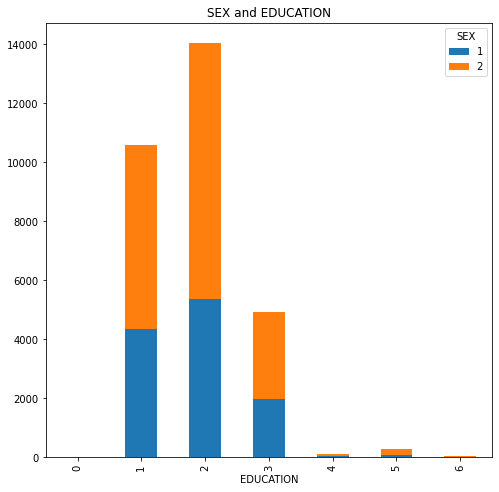

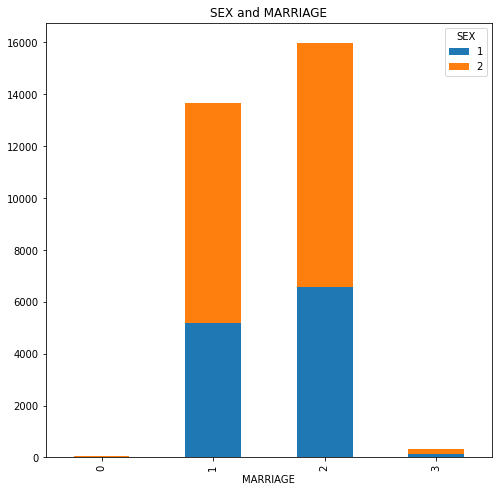

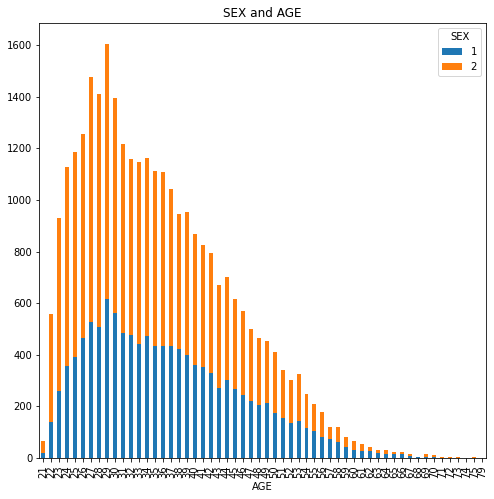

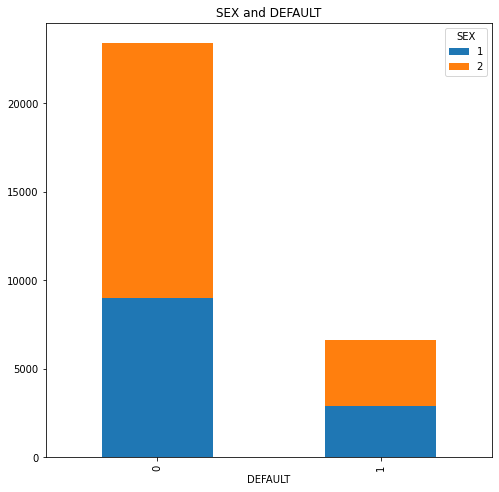

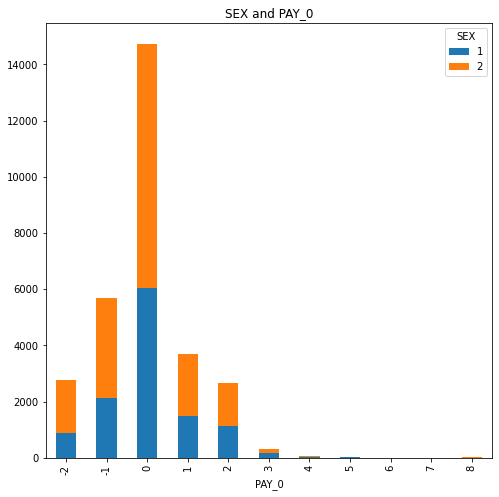

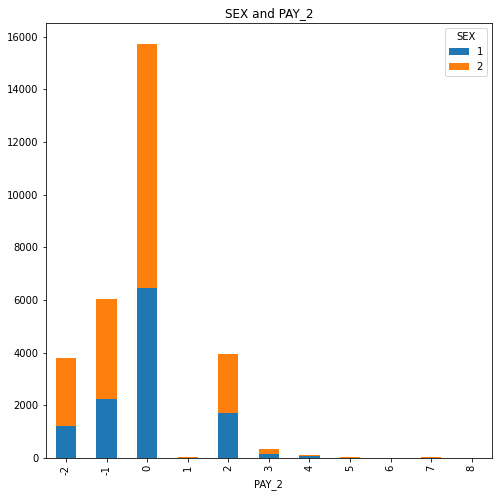

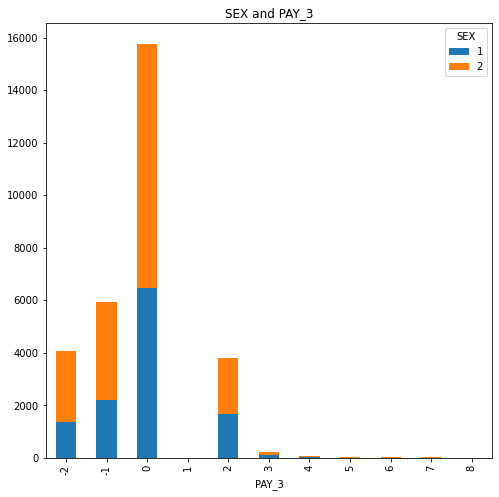

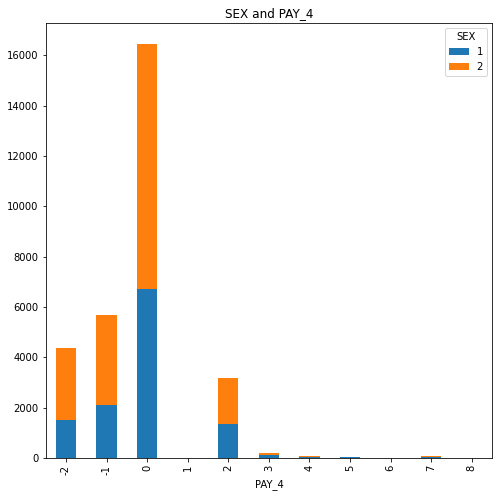

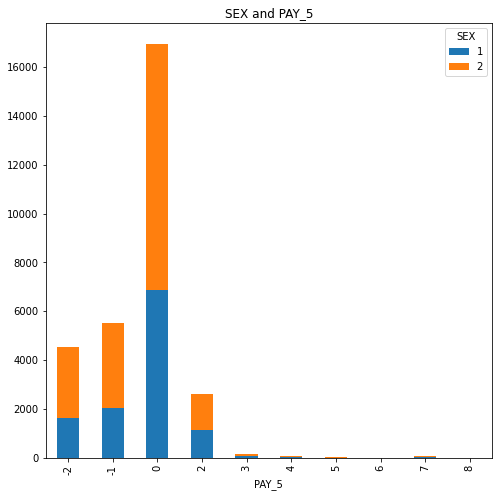

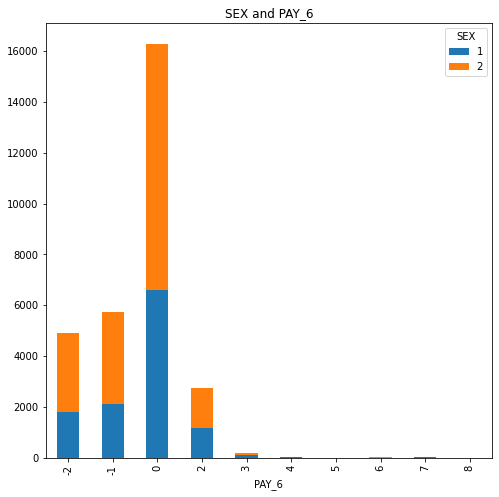

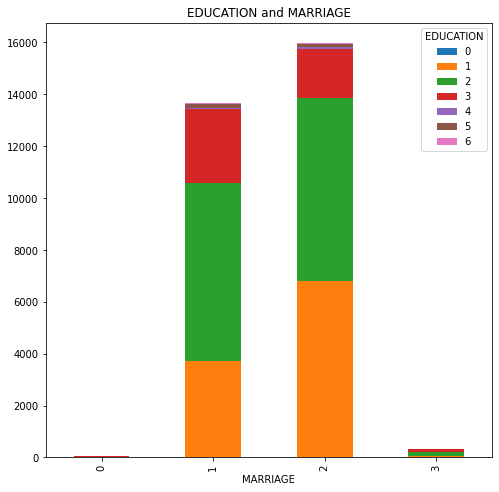

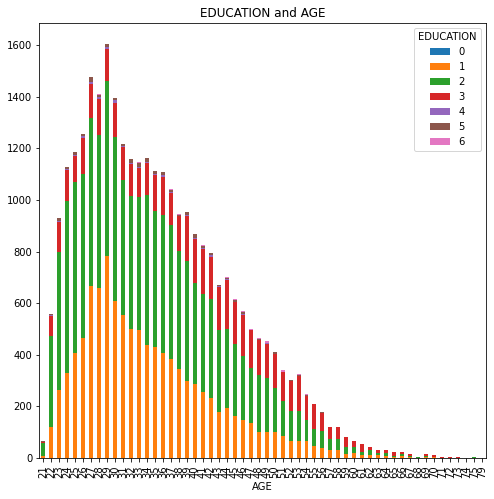

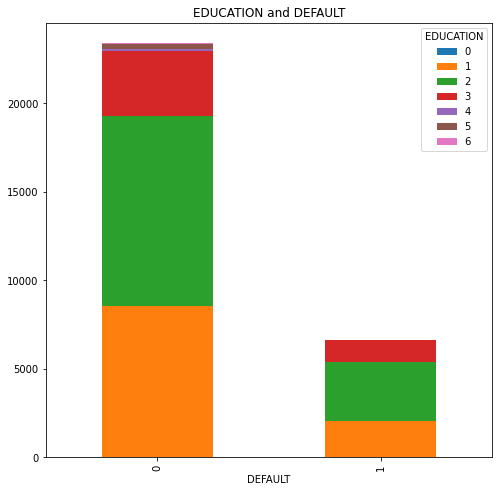

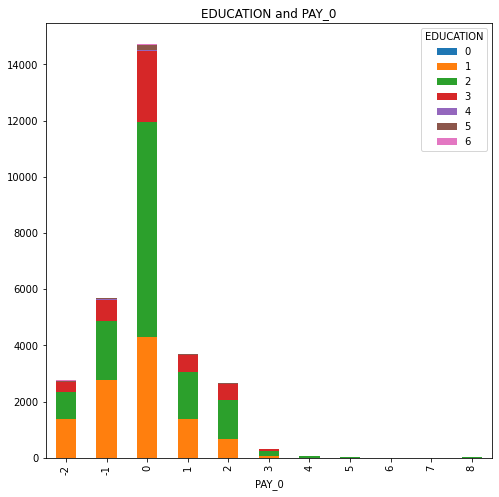

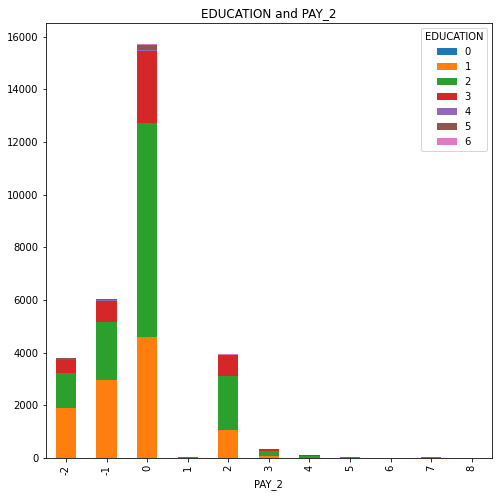

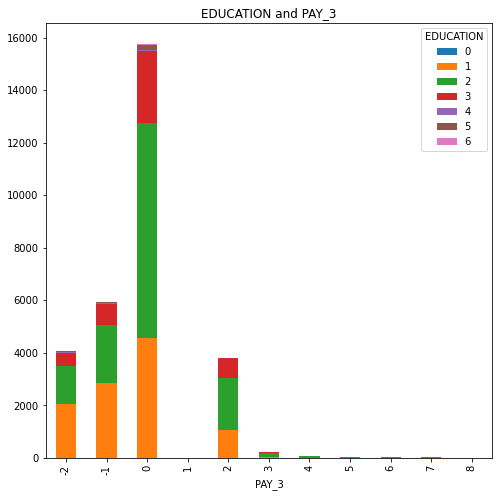

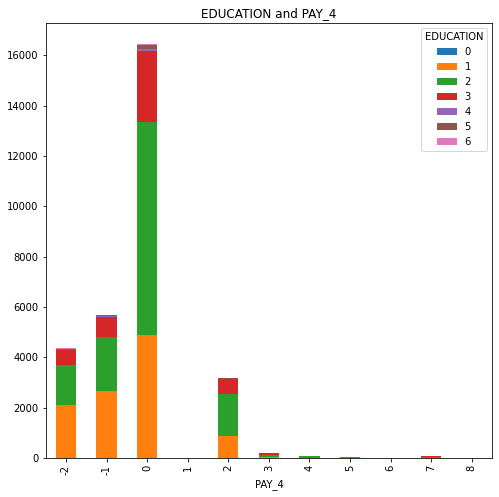

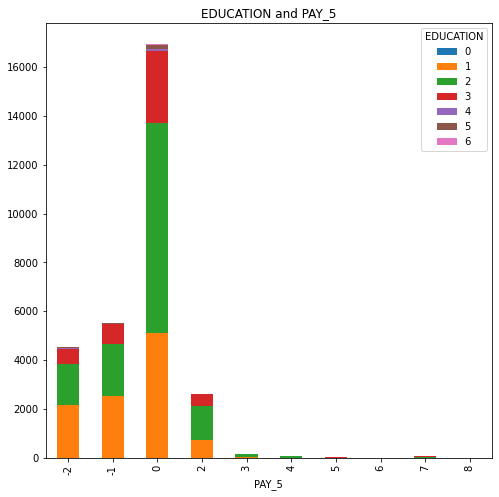

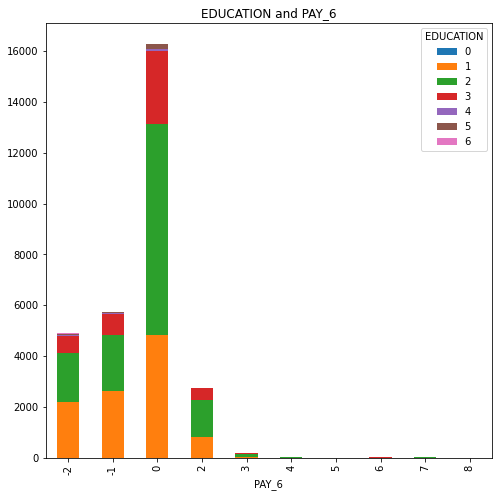

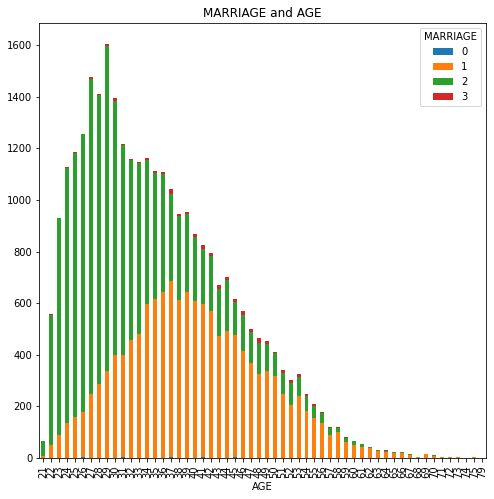

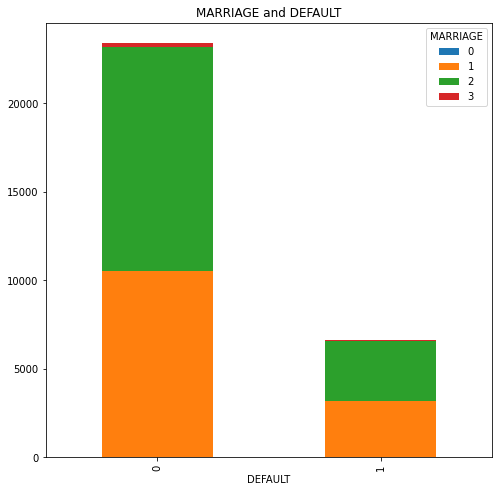

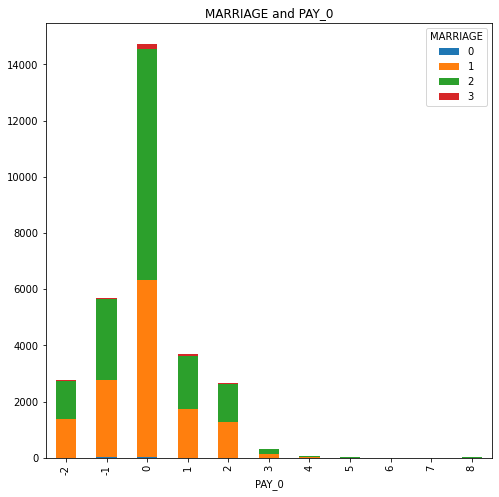

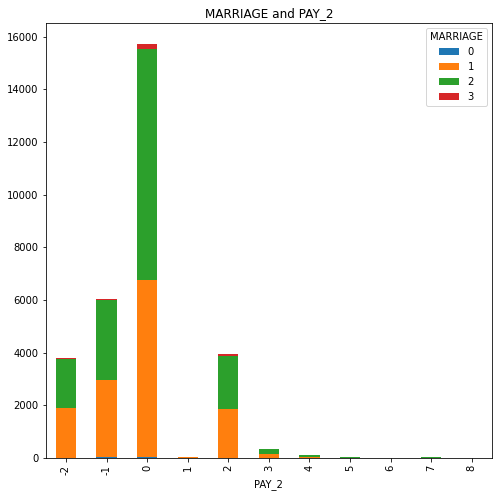

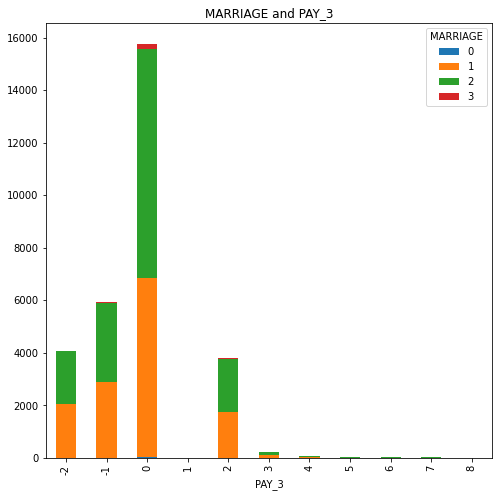

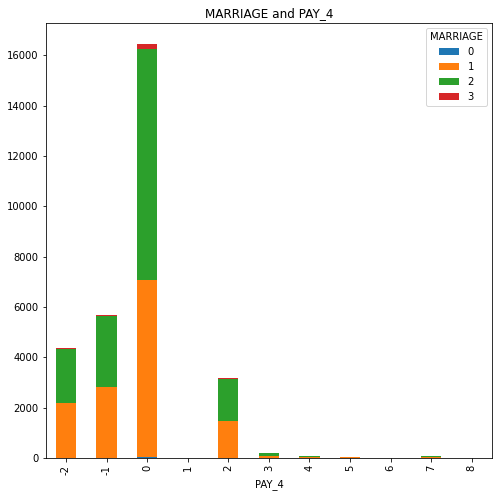

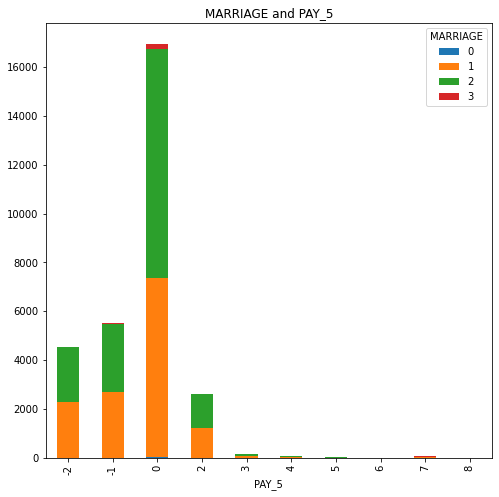

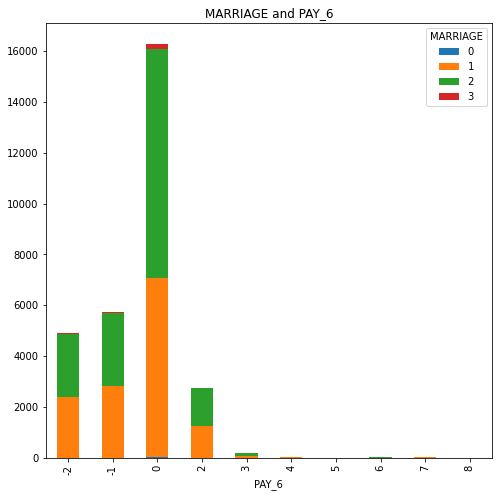

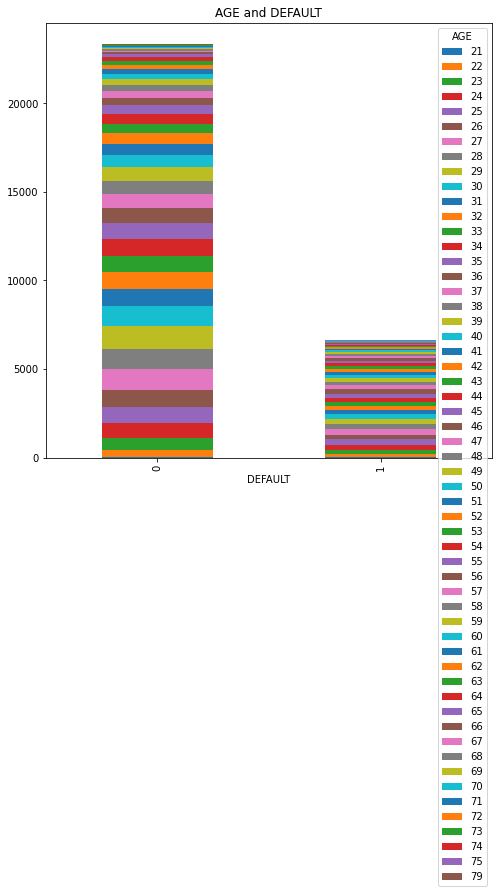

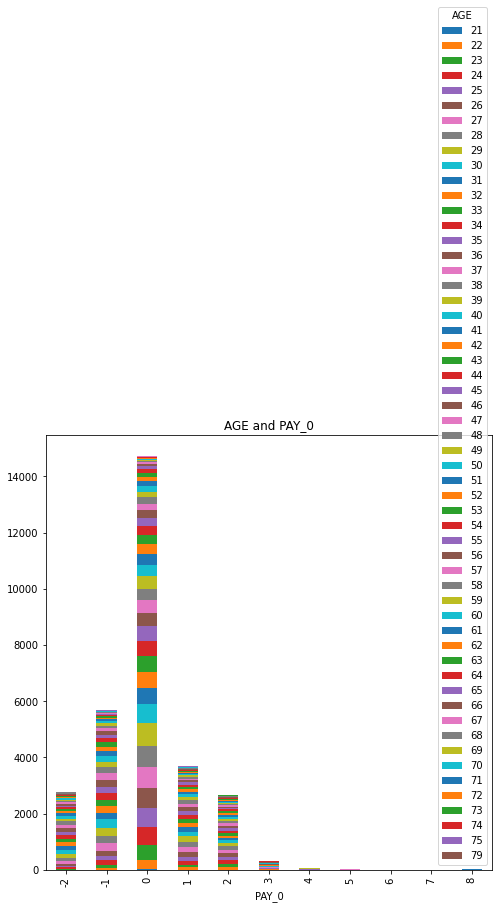

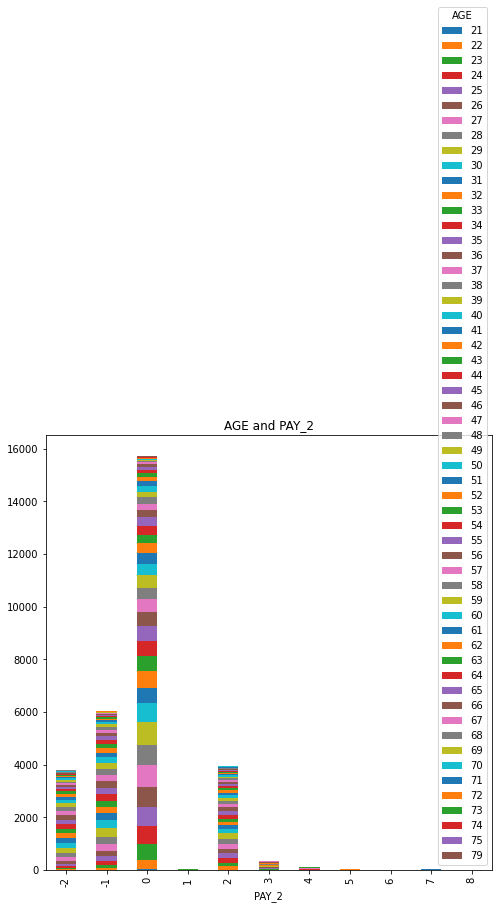

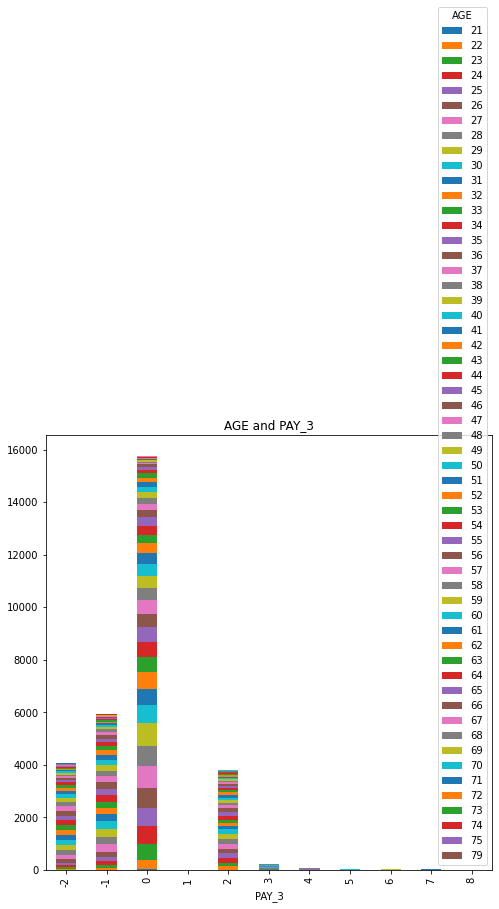

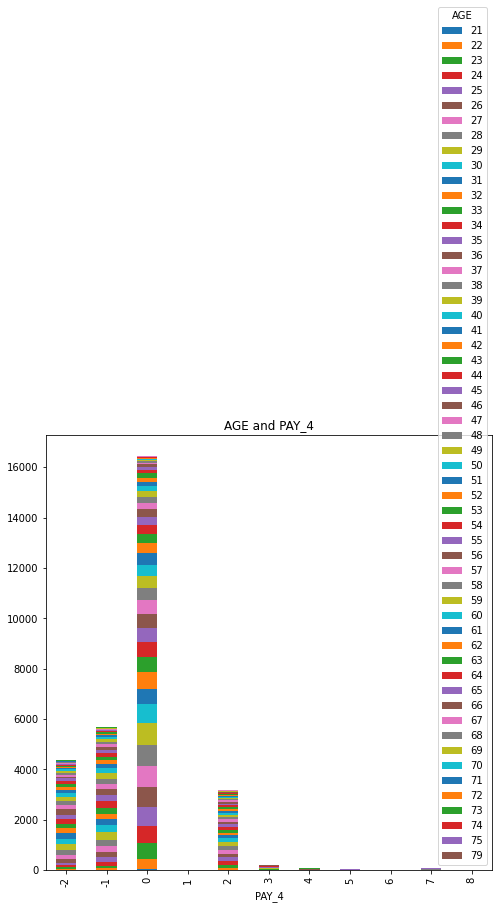

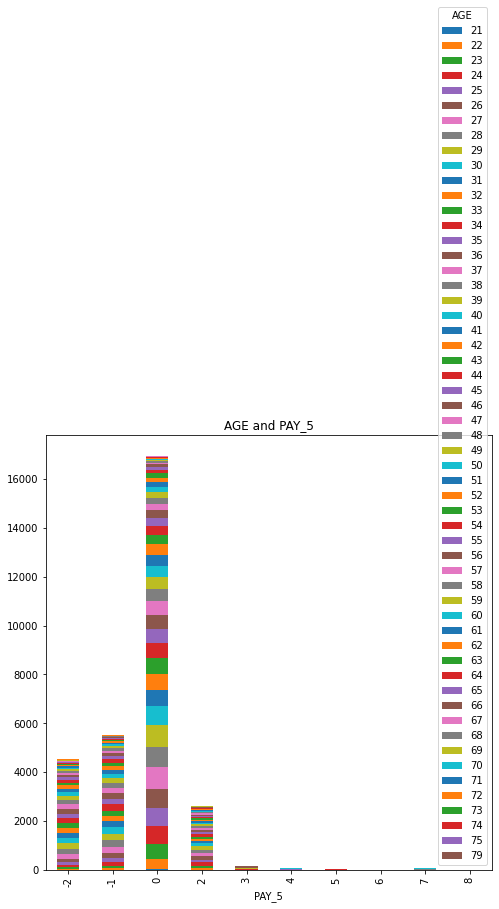

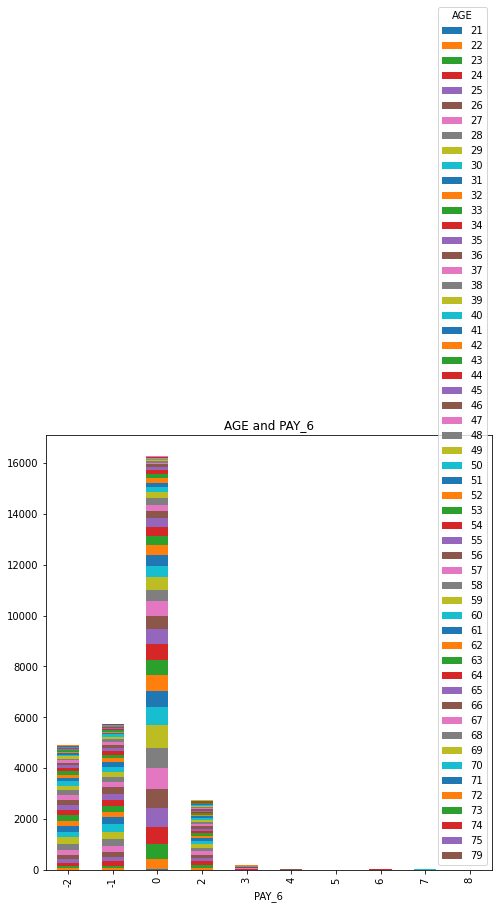

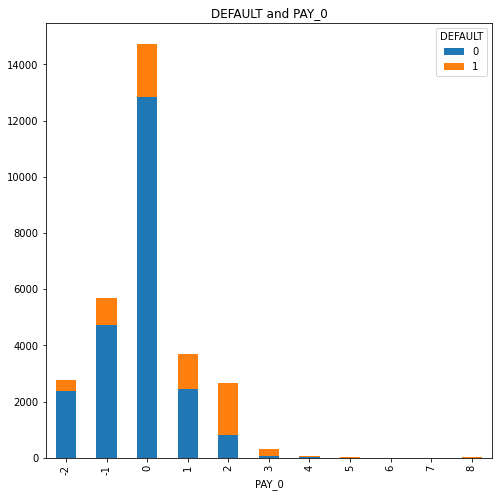

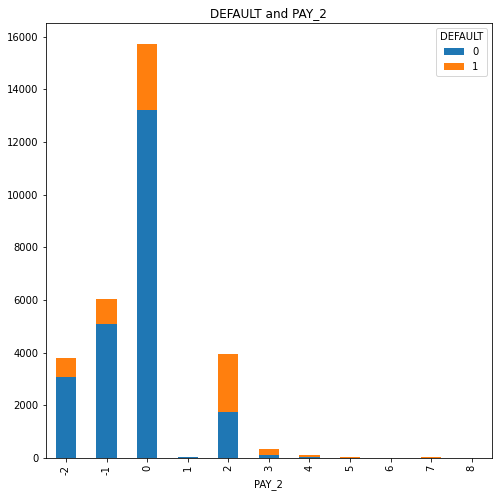

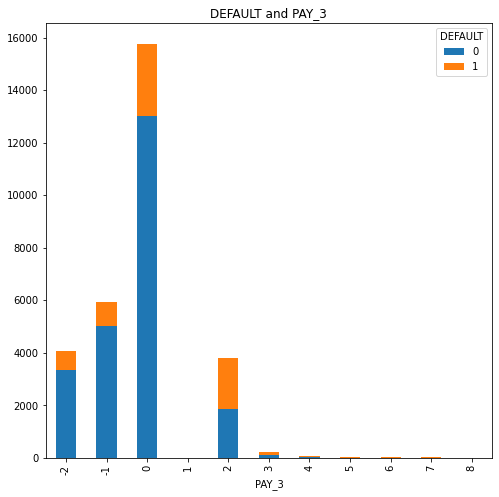

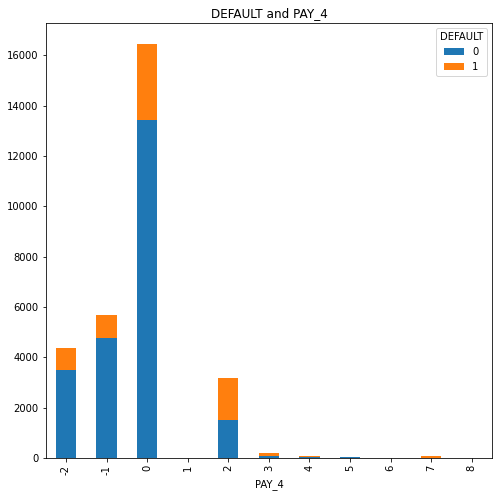

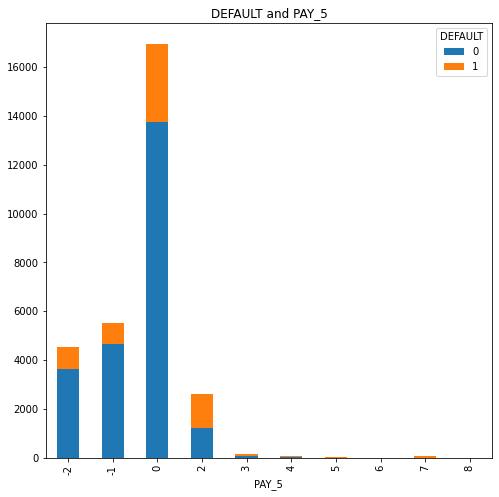

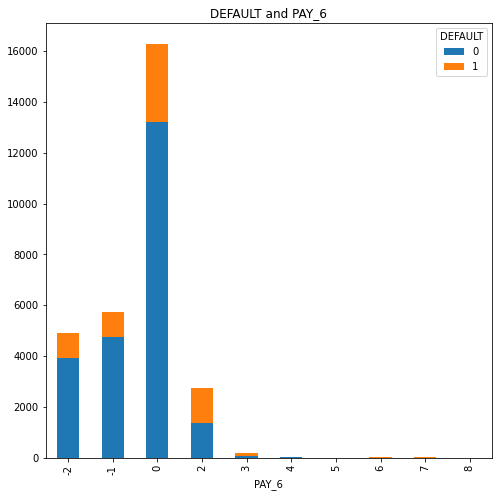

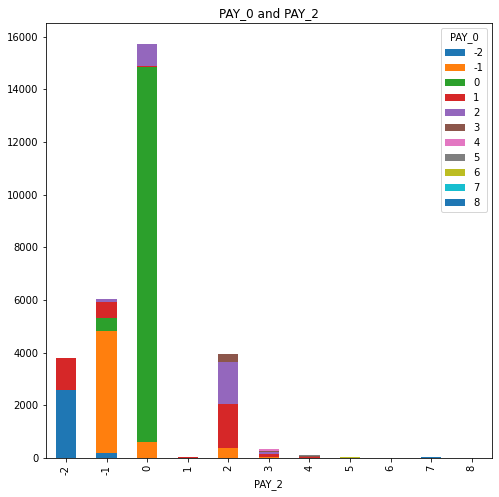

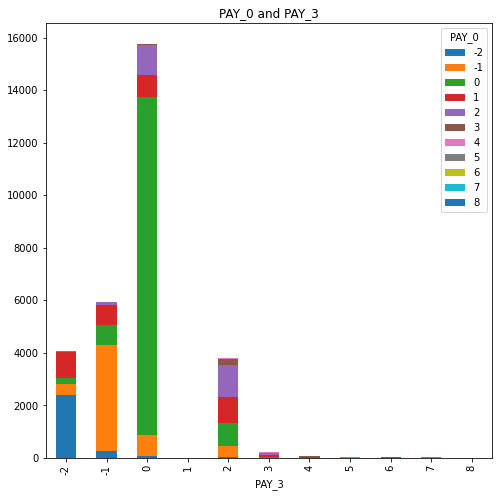

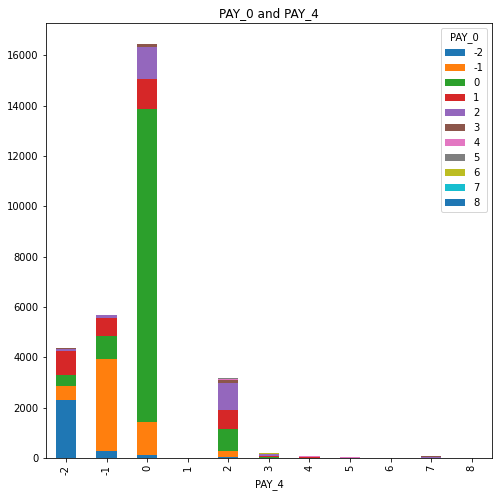

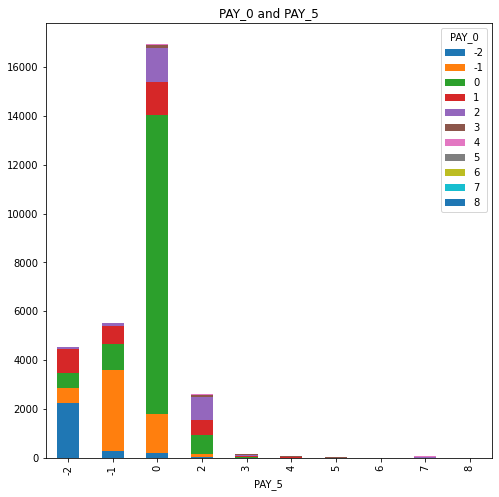

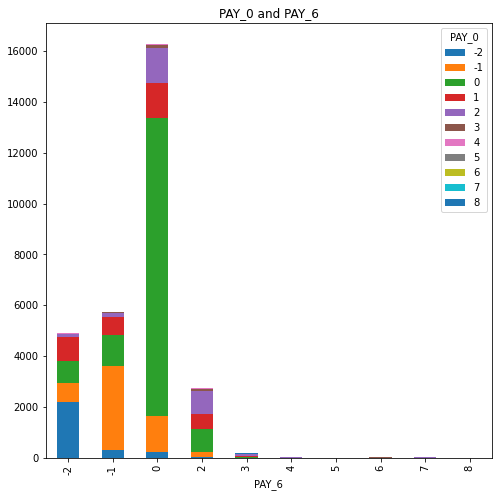

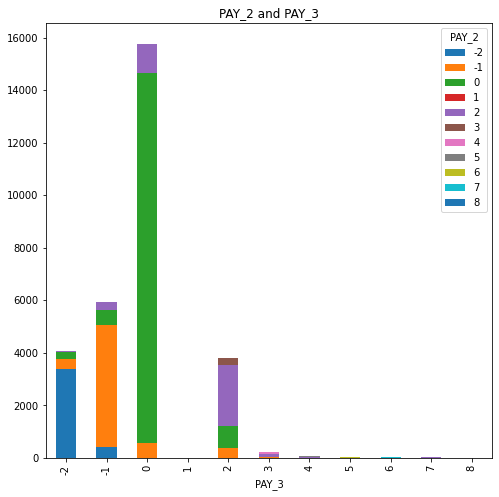

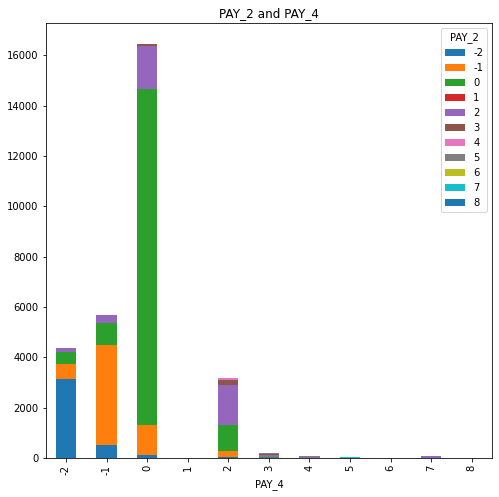

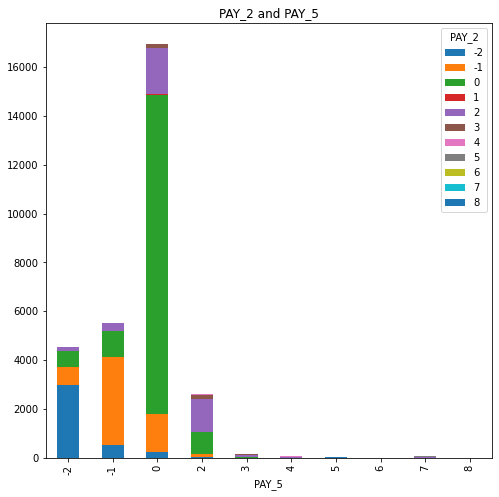

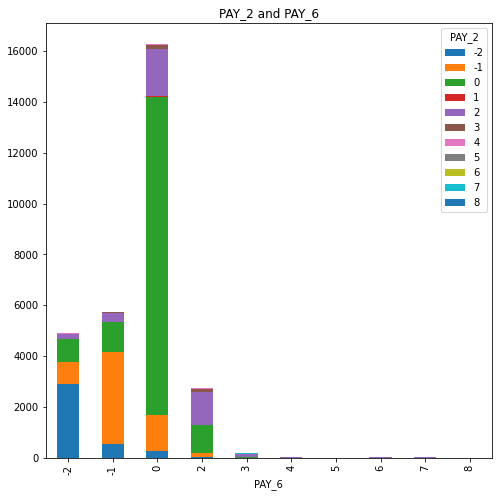

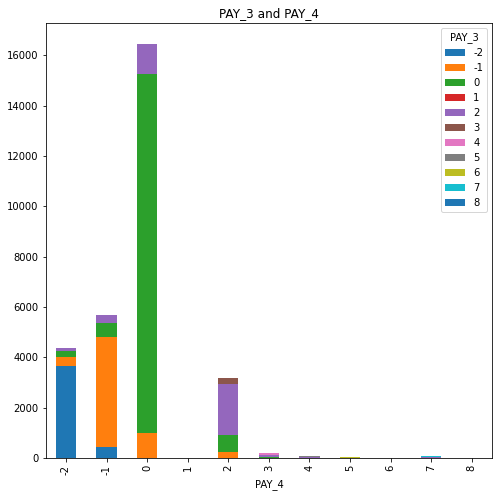

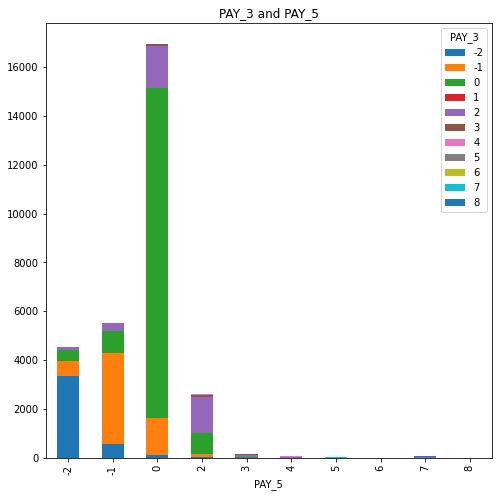

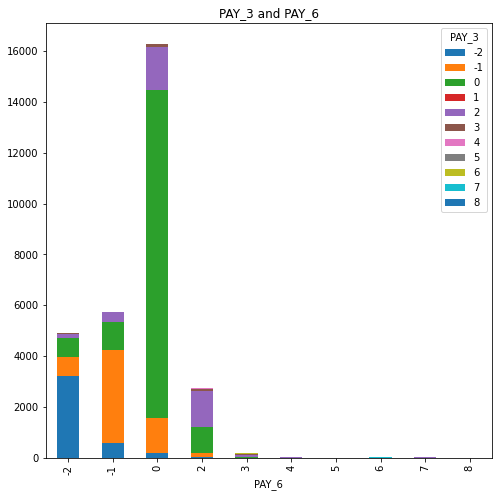

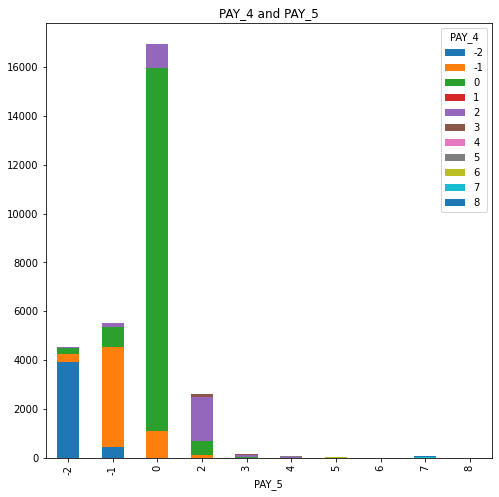

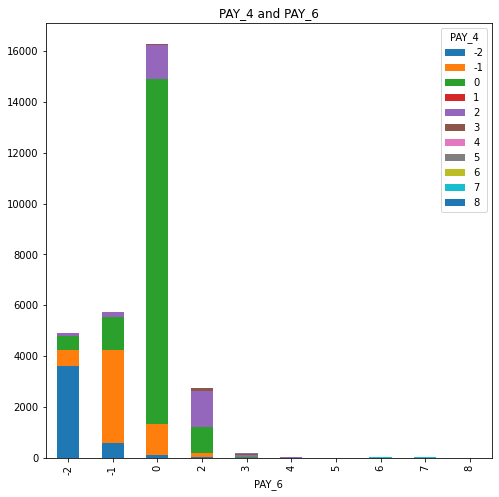

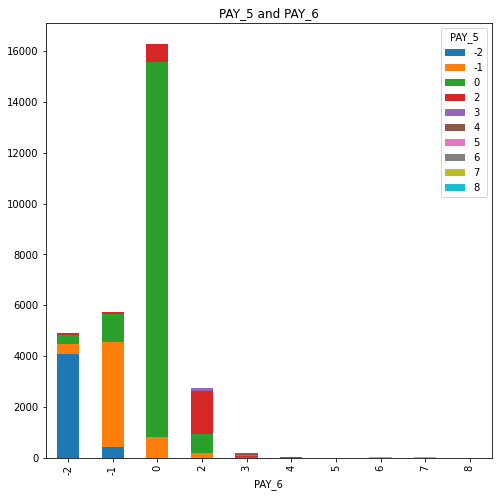

In [38]:
# cross tables and stacked bars for every combination of categorical variables
categorical = ['SEX', 'EDUCATION','MARRIAGE','AGE', 'DEFAULT', 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for i in range(len(categorical)): # nested loop to get all combinations of categorical variables
    cat = categorical
    for j in range(i+1, len(categorical)):
        c1, c2 = cat[i], cat[j]
        tb = pd.crosstab(index=ds[c1], columns=ds[c2])
        display(tb)
        print()
        # code from class
        # Visual exploration of the cross table
        tb.T.plot(kind="bar", figsize=(8,8), stacked=True, title=c1+' and '+c2)

### (TO DO) Visualization II

#### (TO DO) Pair Plots

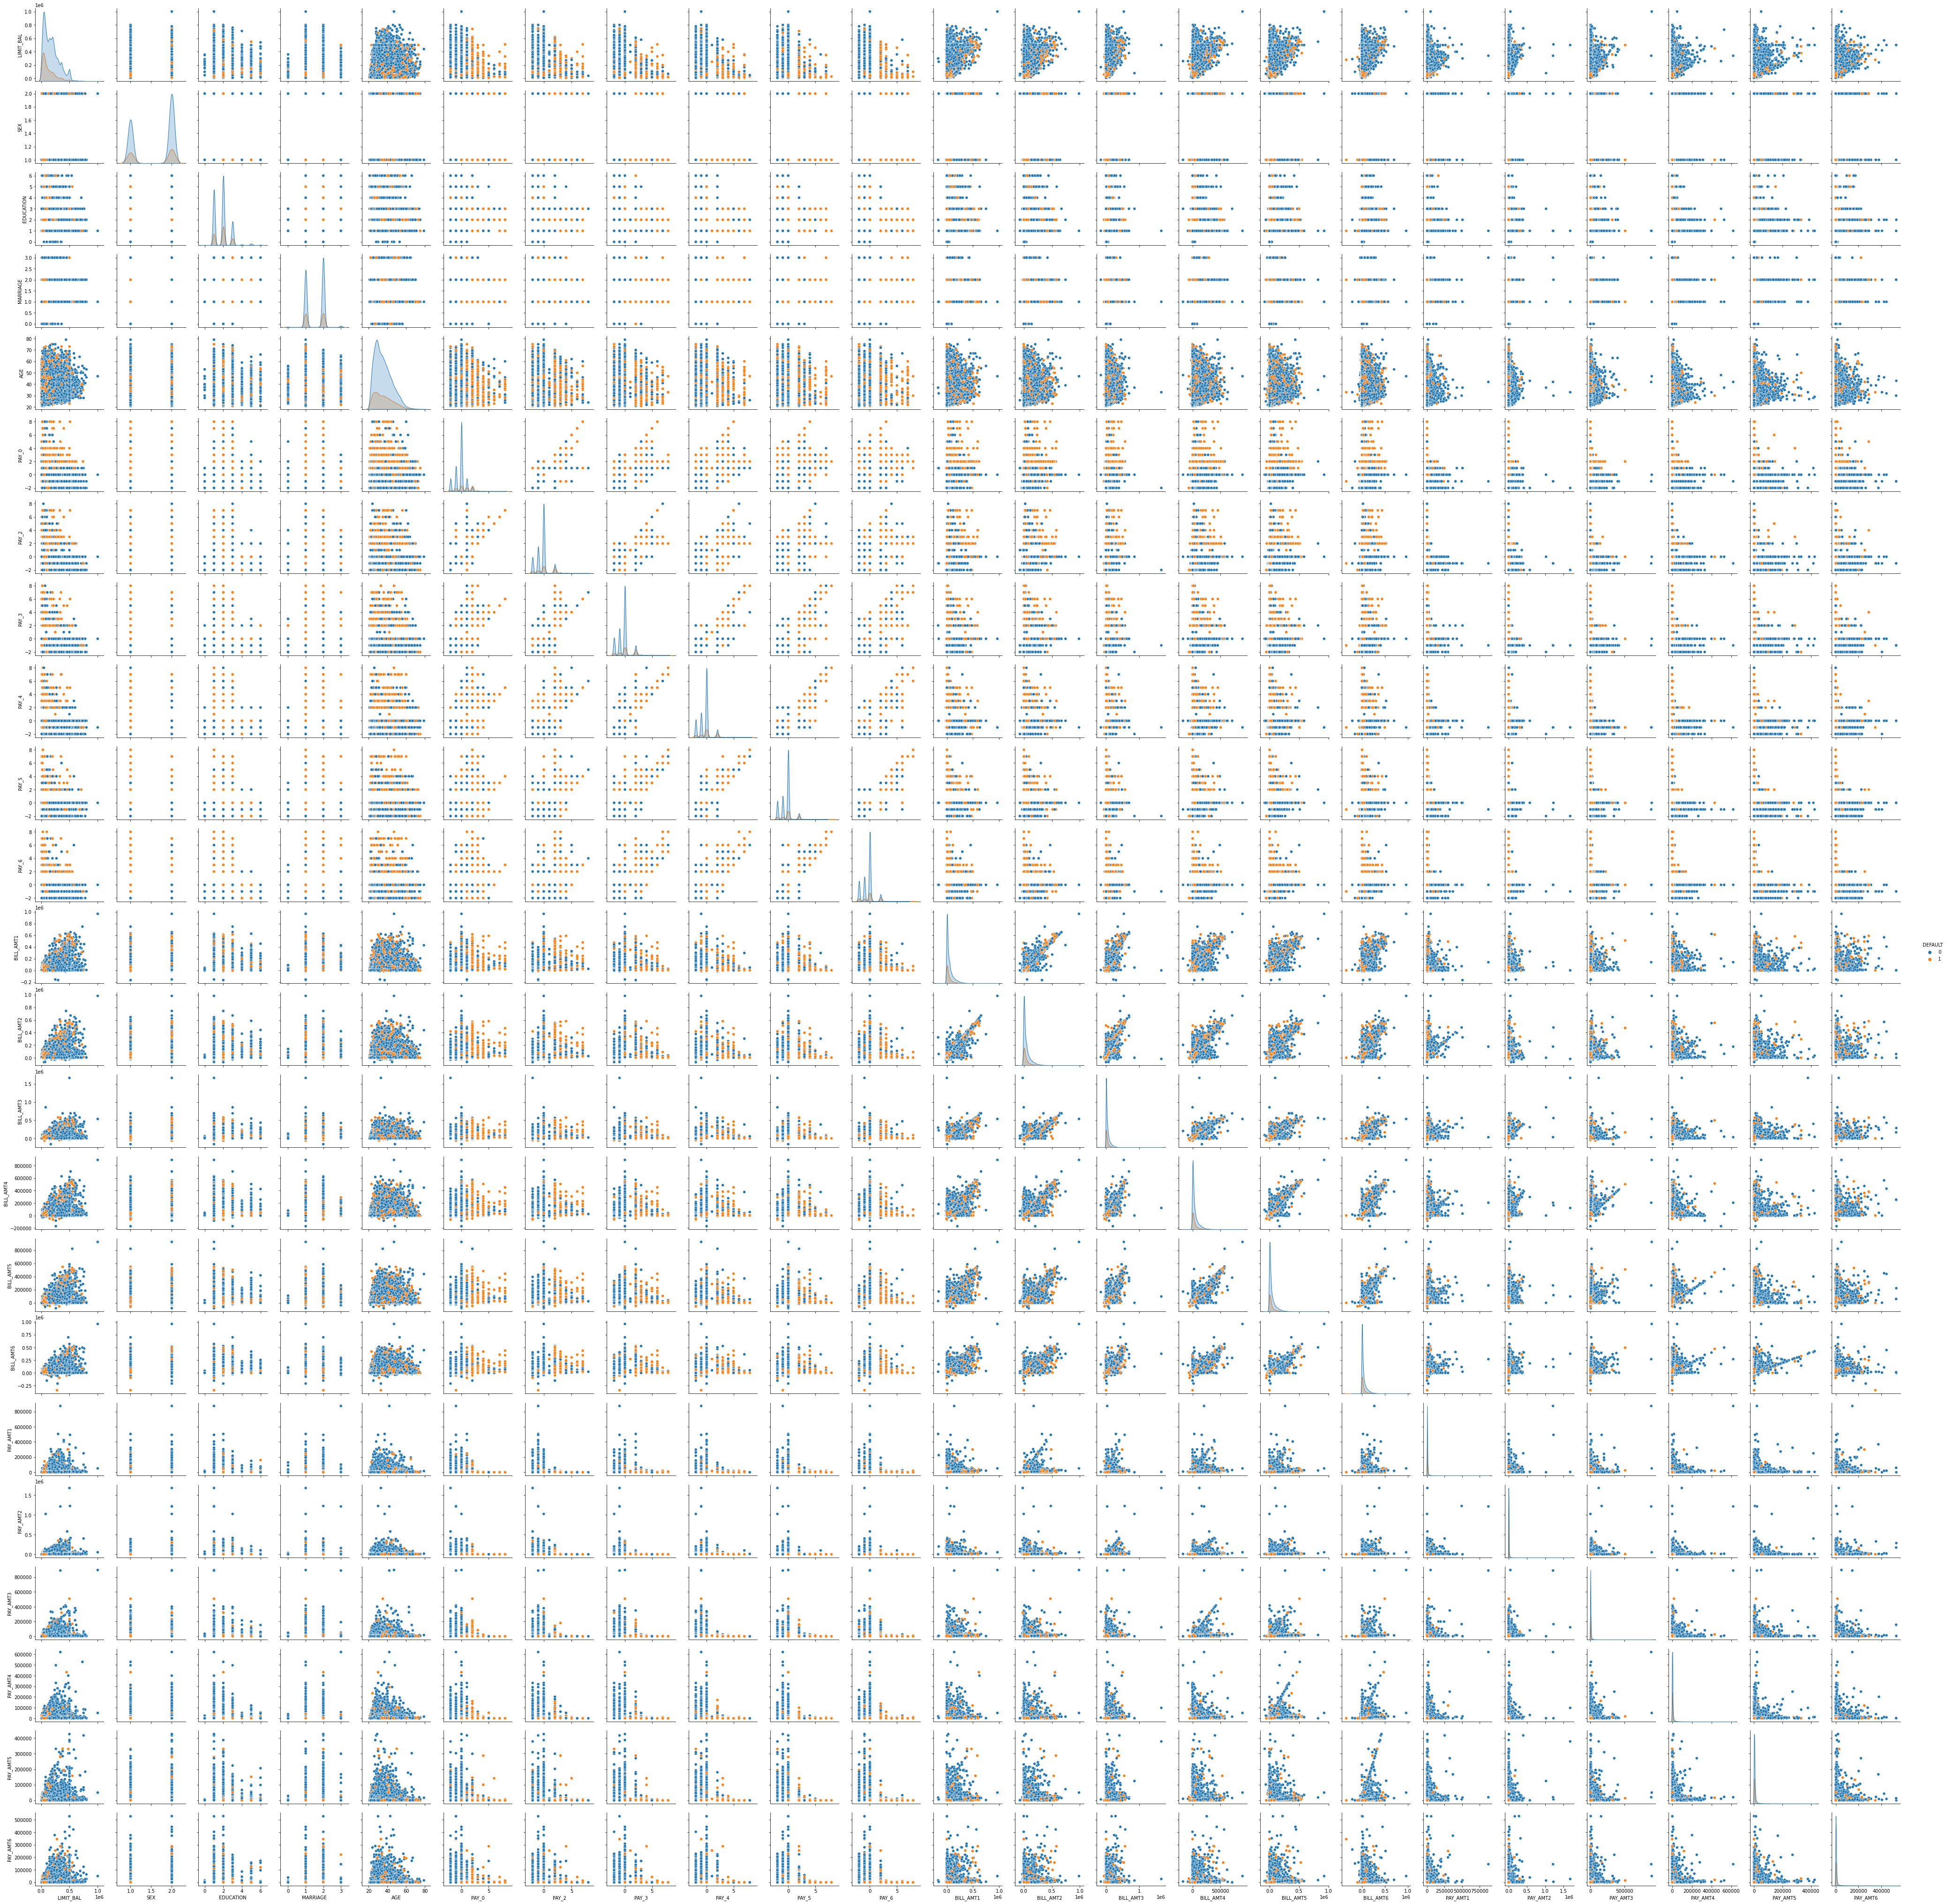

In [39]:
# based on class code
# Pair plot some of the numerical variables with Smoker
g = sns.pairplot(ds[[var for var in ds.columns if var != "ID"]], hue="DEFAULT")

### (TO DO) Data Errors Analysis

In [40]:
ds.describe(include='all').T

count           mean            std       min       25%  \
ID         30000.0   15000.500000    8660.398374       1.0   7500.75   
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  50000.00   
SEX        30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION  30000.0       1.853133       0.790349       0.0      1.00   
MARRIAGE   30000.0       1.551867       0.521970       0.0      1.00   
AGE        30000.0      35.485500       9.217904      21.0     28.00   
PAY_0      30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_2      30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_3      30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_4      30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_5      30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_6      30000.0      -0.291100       1.149988      -2.0     -1.00   
BILL_AMT1  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2  30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT3  30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT4  30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT5  30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT6  30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT1   30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT2   30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT3   30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT4   30000.0    4826.076867   15666.159744       0.0    296.00   
PAY_AMT5   30000.0    4799.387633   15278.305679       0.0    252.50   
PAY_AMT6   30000.0    5215.502567   17777.465775       0.0    117.75   
DEFAULT    30000.0       0.221200       0.415062       0.0      0.00   

                50%        75%        max  
ID          15000.5   22500.25    30000.0  
LIMIT_BAL  140000.0  240000.00  1000000.0  
SEX             2.0       2.00        2.0  
EDUCATION       2.0       2.00        6.0  
MARRIAGE        2.0       2.00        3.0  
AGE            34.0      41.00       79.0  
PAY_0           0.0       0.00        8.0  
PAY_2           0.0       0.00        8.0  
PAY_3           0.0       0.00        8.0  
PAY_4           0.0       0.00        8.0  
PAY_5           0.0       0.00        8.0  
PAY_6           0.0       0.00        8.0  
BILL_AMT1   22381.5   67091.00   964511.0  
BILL_AMT2   21200.0   64006.25   983931.0  
BILL_AMT3   20088.5   60164.75  1664089.0  
BILL_AMT4   19052.0   54506.00   891586.0  
BILL_AMT5   18104.5   50190.50   927171.0  
BILL_AMT6   17071.0   49198.25   961664.0  
PAY_AMT1     2100.0    5006.00   873552.0  
PAY_AMT2     2009.0    5000.00  1684259.0  
PAY_AMT3     1800.0    4505.00   896040.0  
PAY_AMT4     1500.0    4013.25   621000.0  
PAY_AMT5     1500.0    4031.50   426529.0  
PAY_AMT6     1500.0    4000.00   528666.0  
DEFAULT         0.0       0.00        1.0

In [41]:
# Analyse unique values of codified variables to see if there are any errors
cols = ['SEX', 'EDUCATION','MARRIAGE','AGE', 'DEFAULT']
for var in ds[cols].columns:
    print(var,":\n",ds[var].unique(), sep="")
    print()

SEX:
[2 1]

EDUCATION:
[2 1 3 5 4 6 0]

MARRIAGE:
[1 2 3 0]

AGE:
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]

DEFAULT:
[1 0]



In [42]:
# See if any unique value is wrong for pay variables
cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for var in ds[cols].columns:
    print(var,":\n",ds[var].unique(), sep="")
    print()

PAY_0:
[ 2 -1  0 -2  1  3  4  8  7  5  6]

PAY_2:
[ 2  0 -1 -2  3  5  7  4  1  6  8]

PAY_3:
[-1  0  2 -2  3  4  6  7  1  5  8]

PAY_4:
[-1  0 -2  2  3  4  5  7  6  1  8]

PAY_5:
[-2  0 -1  2  3  5  4  7  8  6]

PAY_6:
[-2  2  0 -1  3  6  4  7  8  5]



(TO DO) Observations: 
1. EDUCATION should only have numbers 1, 2, 3 and 4, but it has a max value of 6. This is clearly an error, so we should inspect and remove/replace values that fall outside the supposed ones.
2. We can also see from the unique values, that there are also EDUCATION values of 5, which are not supposed to exist as well;
3. MARRIAGE has also some 0 values (should only be 1, 2 or 3);
4. Besides points 1, 2 and 3, we can't really detect any more errors since: we already know that the columns only have int values, so there are no floats in between supposed value (for example MARRIAGE = 1.5); we already saw that all variables have the same amount of data (no missing values); -2 seems to be an acceptable value for the 'PAY_X' variables according to this [Kaggle](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/34608), so we decided not to treat as an error.
5. JM: Education==0??

## (TO DO) Data Preparation

In [43]:
# import statements for Data Preparation

In [44]:
# code from class
# Create a modeling dataset from the original dataset
X = ds.copy(deep=True)# we'll keep the dataset with no data preparation
X_dp = ds.copy(deep=True)# with data preparation

### Dealing with Data Errors

In [45]:
print('EDUCATION values larger than 4:',X_dp[X_dp['EDUCATION']>4]['EDUCATION'].count())
print('EDUCATION values equal to 0:',X_dp[X_dp['EDUCATION']==0]['EDUCATION'].count())
print('MARRIAGE values equal to 0:',X_dp[X_dp['MARRIAGE']==0]['MARRIAGE'].count())

EDUCATION values larger than 4: 331
EDUCATION values equal to 0: 14
MARRIAGE values equal to 0: 54


- There are only 331 observations in EDUCATION with a value greater than 4. We can assume these as mistakes and equal them all to 4
- There are only 14 observations with EDUCATION==0, so we'll put them in the others category (4) as well.
- There are only 54 observations in MARRIAGE with a value equal to 0. We can also assume these as mistakes and equal them all to 3 (others)

In [46]:
X_dp.loc[X_dp.EDUCATION > 4,'EDUCATION'] = 4 # put EDUCATION values greater than 4 equal to 4 (others)
print('EDUCATION values larger than 4:',X_dp[X_dp['EDUCATION']>4]['EDUCATION'].count())
X_dp.loc[X_dp.EDUCATION==0,'EDUCATION'] = 4 # others
print('EDUCATION values equal to 0:',X_dp[X_dp['EDUCATION']==0]['EDUCATION'].count())
X_dp.loc[X_dp.MARRIAGE==0,'MARRIAGE'] = 3 # others
print('MARRIAGE values equal to 0:',X_dp[X_dp['MARRIAGE']==0]['MARRIAGE'].count())

EDUCATION values larger than 4: 0
EDUCATION values equal to 0: 0
MARRIAGE values equal to 0: 0


### (TO DO) Feature Engineering

We will try some alternatives to having the columns that relate to date from April to September.
This variables are the main focus of our feature engineering since they are a very large percentage of the variables available.


In [ ]:
#Will not have all the PAY_X but instead it will have the avg value of them all per row
X_payDelayAvg = X_dp.drop(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1)
#Will not have all the PAY_X but instead it will have the mode value of them all per row
X_payDelayMode = X_dp.drop(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1)

#Will not have all the BILL_AMTX nor the PAY_AMTX  but instead will have the avg percentage
X_unpaidPercentageAvg = X_dp.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1)

In [ ]:
#https://stackoverflow.com/questions/27317517/make-division-by-zero-equal-to-zero
#So taht zero divison equals to 1 (the user has paid everything before)
def avoid_zeroDivision(n, d):
    return n / d if d else 1

row_avgs = []
row_modes = []
avgPercs_paid = []
for index, row in X_dp.iterrows():
    
    '''
    Get the COLUMN to replace the PAY_Xs
    '''
    row_vals = [row['PAY_0'], row['PAY_2'], row['PAY_3'], row['PAY_4'], row['PAY_5'], row['PAY_6']]
    row_vals.sort(reverse=True)#makes the list sorted from. These makes it so uf there are multiple modes
                                #we choose the worst one (more months in delay)

    row_avg = (sum(row_vals))/6
    row_avgs.append(row_avg)

    row_mode = max(set(row_vals), key=row_vals.count)
    row_modes.append(row_mode)

    '''
    Get the COLUMN to replace the BILL_AMTXs and the PAY_AMTXs
    '''

    percs_paid = [avoid_zeroDivision(row['PAY_AMT1'],row['BILL_AMT1']), avoid_zeroDivision(row['PAY_AMT2'],row['BILL_AMT2']), 
                  avoid_zeroDivision(row['PAY_AMT3'],row['BILL_AMT3']), avoid_zeroDivision(row['PAY_AMT4'],row['BILL_AMT4']), 
                  avoid_zeroDivision(row['PAY_AMT5'],row['BILL_AMT5']), avoid_zeroDivision(row['PAY_AMT6'],row['BILL_AMT6'])]
    avgPercs_paid.append(sum(percs_paid)/len(percs_paid))


In [ ]:
X_payDelayAvg['PAY_DELAY_AVG'] = row_avgs 
print(X_payDelayAvg.head())

In [ ]:
X_payDelayMode['PAY_DELAY_MODE'] = row_modes
print(X_payDelayMode.head())

In [ ]:
X_unpaidPercentageAvg['PAY_PERC_AVG'] = avgPercs_paid 
print(X_payDelayMode.head())

### Encoding Categorical Variables into dummies

In [ ]:
# Categorize numerical variables for the Average Delay df
categoricals = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_DELAY_AVG']
for var in categoricals:
    X_payDelayAvg[var] = X_payDelayAvg[var].astype('category')

cols = X_payDelayAvg.select_dtypes(include=['category']).columns
# this is similar to one-hot enconding, but simpler to implement
X_payDelayAvg = pd.get_dummies(data=X_payDelayAvg,columns=cols,drop_first=False)

X_payDelayAvg.head()

In [ ]:
# Categorize numerical variables for the Mode Delay df
categoricals = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_DELAY_AVG']
for var in categoricals:
    X_payDelayMode[var] = X_payDelayMode[var].astype('category')

cols = X_payDelayMode.select_dtypes(include=['category']).columns
# this is similar to one-hot enconding, but simpler to implement
X_payDelayMode = pd.get_dummies(data=X_payDelayMode,columns=cols,drop_first=False)

X_payDelayMode.head()

In [ ]:
# Categorize numerical variables for the paid percentage df
categoricals = ['SEX','EDUCATION','MARRIAGE','AGE', 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for var in categoricals:
    X_unpaidPercentageAvg[var] = X_unpaidPercentageAvg[var].astype('category')

cols = X_unpaidPercentageAvg.select_dtypes(include=['category']).columns
# this is similar to one-hot enconding, but simpler to implement
X_unpaidPercentageAvg = pd.get_dummies(data=X_unpaidPercentageAvg,columns=cols,drop_first=False)

X_unpaidPercentageAvg.head()

In [47]:
# (TO DO) see how we can adapt professors code below from LR notebook
# Encode multi-categorical variables to dummy variables (to avoid high cardinality and strange distributions)

# Function to return categories of columns based on threshold of distribution of the category
# def one_hot(s, threshold,prefix):
#     d = pd.get_dummies(s)
#     f = pd.value_counts(s, sort=False, normalize=True) < threshold
#     if f.sum() == 0:
#         newSeries=d
#     else:
#         newSeries=d.loc[:, ~f].join(d.loc[:, f].sum(1).rename('Other'))
#     newSeries=newSeries.add_prefix(prefix)
#     return newSeries

# # One hot encoding of all categories above 15% - all others categories to "Other"
# cols = ['job', 'marital', 'education']
# for i in range(len(cols)):
#     colToProcess = X[cols[i]].astype(str)
#     procDF = one_hot(colToProcess, .15,cols[i]+'_')
#     X.drop(columns=cols[i], inplace=True)
#     X = pd.concat([X, procDF], axis=1)

In [48]:
# Categorize numerical variables for the regular df
categoricals = ['SEX','EDUCATION','MARRIAGE','AGE', 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for var in categoricals:
    X_dp[var] = X_dp[var].astype('category')
X_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  int64   
 2   SEX        30000 non-null  category
 3   EDUCATION  30000 non-null  category
 4   MARRIAGE   30000 non-null  category
 5   AGE        30000 non-null  category
 6   PAY_0      30000 non-null  category
 7   PAY_2      30000 non-null  category
 8   PAY_3      30000 non-null  category
 9   PAY_4      30000 non-null  category
 10  PAY_5      30000 non-null  category
 11  PAY_6      30000 non-null  category
 12  BILL_AMT1  30000 non-null  int64   
 13  BILL_AMT2  30000 non-null  int64   
 14  BILL_AMT3  30000 non-null  int64   
 15  BILL_AMT4  30000 non-null  int64   
 16  BILL_AMT5  30000 non-null  int64   
 17  BILL_AMT6  30000 non-null  int64   
 18  PAY_AMT1   30000 non-null  int64   
 19  PAY_AMT2   30000 non-null

In [49]:
cols = X_dp.select_dtypes(include=['category']).columns
# this is similar to one-hot enconding, but simpler to implement
X_dp = pd.get_dummies(data=X_dp,columns=cols,drop_first=False)

In [50]:
# (TO DO) remove dummies with higher frequency

In [51]:
X_dp.head()

ID  LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0   1      20000       3913       3102        689          0          0   
1   2     120000       2682       1725       2682       3272       3455   
2   3      90000      29239      14027      13559      14331      14948   
3   4      50000      46990      48233      49291      28314      28959   
4   5      50000       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_-2  PAY_6_-1  PAY_6_0  PAY_6_2  \
0          0         0       689  ...         1         0        0        0   
1       3261         0      1000  ...         0         0        0        1   
2      15549      1518      1500  ...         0         0        1        0   
3      29547      2000      2019  ...         0         0        1        0   
4      19131      2000     36681  ...         0         0        1        0   

   PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  

[5 rows x 144 columns]

### Outliers

(TO DO) Explicar as variáveis escolhidas para remoção de outliers.

(TO DO) Ver se a remoção dos outliers não devia ser só feita ao train test.

In [52]:
# Function from the professor
# Function to find outliers on columns based on percentile
'''
Everything bellow lowPercentile or above highPercentile will be considered outliers and removed
'''
def removeOutliers(df, colList, lowPercentile=0.05, highPercentile=0.95, verbose=False):
    quant_df = df[colList].quantile([lowPercentile, highPercentile])
    if verbose:
        print(quant_df)
    for name in list(df[colList].columns):
        df = df[(df[name] >= quant_df.loc[lowPercentile, name]) & (df[name] <= quant_df.loc[highPercentile, name])]
    return df

# Find and remove outliers for 1% percentiles (higher and lower) for the following variables
cols = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4','BILL_AMT5', 'BILL_AMT6', 
        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]
X_dpno = X_dp.copy() # save df with removed outliers in a new df called X_dpno
X_dpno = removeOutliers(X_dpno, colList=cols , lowPercentile=0.01, highPercentile=0.99, verbose=True)

      LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0.01    10000.0     -81.00    -200.00    -200.00    -212.02    -232.01   
0.99   500000.0  350110.68  337495.28  325030.39  304997.27  285868.33   

      BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0.01    -331.03      0.00      0.00       0.0      0.00      0.00      0.00  
0.99  279505.06  66522.18  76651.02   70000.0  67054.44  65607.56  82619.05  


In [53]:
X_dpno

ID  LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0          1      20000       3913       3102        689          0   
1          2     120000       2682       1725       2682       3272   
2          3      90000      29239      14027      13559      14331   
3          4      50000      46990      48233      49291      28314   
4          5      50000       8617       5670      35835      20940   
...      ...        ...        ...        ...        ...        ...   
29994  29995      80000      72557      77708      79384      77519   
29995  29996     220000     188948     192815     208365      88004   
29996  29997     150000       1683       1828       3502       8979   
29997  29998      30000       3565       3356       2758      20878   
29999  30000      50000      47929      48905      49764      36535   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_-2  PAY_6_-1  \
0              0          0         0       689  ...         1         0   
1           3455       3261         0      1000  ...         0         0   
2          14948      15549      1518      1500  ...         0         0   
3          28959      29547      2000      2019  ...         0         0   
4          19146      19131      2000     36681  ...         0         0   
...          ...        ...       ...       ...  ...       ...       ...   
29994      82607      81158      7000      3500  ...         0         0   
29995      31237      15980      8500     20000  ...         0         0   
29996       5190          0      1837      3526  ...         0         0   
29997      20582      19357         0         0  ...         0         0   
29999      32428      15313      2078      1800  ...         0         0   

       PAY_6_0  PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
0            0        0        0        0        0        0        0        0  
1            0        1        0        0        0        0        0        0  
2            1        0        0        0        0        0        0        0  
3            1        0        0        0        0        0        0        0  
4            1        0        0        0        0        0        0        0  
...        ...      ...      ...      ...      ...      ...      ...      ...  
29994        0        1        0        0        0        0        0        0  
29995        1        0        0        0        0        0        0        0  
29996        1        0        0        0        0        0        0        0  
29997        1        0        0        0        0        0        0        0  
29999        1        0        0        0        0        0        0        0  

[27163 rows x 144 columns]

Observations:
- The df with removed outliers has now 27163 observations, vs. the 30000 in the previous data sets.

In [54]:
# we'll store the different dfs so far in a dictionary of alternative dfs
#  this can later be used for applying the same operations to each of the alternative dfs
dfs = {'X': X, 'X_dp': X_dp, 'X_dpno': X_dpno, 'X_payDelayAvg': X_payDelayAvg,
        'X_payDelayMode': X_payDelayMode, 'X_unpaidPercentageAvg': X_unpaidPercentageAvg}

### (TO DO) Binning Data

### Data Normalization

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
# create dictionary to store normalized dataframes
dfs_norm = {}

In [57]:
# normalize data with MinMaxScaler for alternative dfs and save them in new dictionary of normalized dfs
for df_name, df in dfs.items():
    dfs_norm[df_name] = pd.DataFrame(MinMaxScaler().fit_transform(df.values), columns=df.columns, index=df.index)

Compare dataframes before and after normalization.

In [58]:
dfs['X'] # before

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0             0         0         0         0        1  
1          1000      1000         0      2000        1  
2          1000      1000      1000      5000        0  
3          1200      1100      1069      1000        0  
4         10000      9000       689       679        0  
...         ...       ...       ...       ...      ...  
29995      5003      3047      5000      1000        0  
29996      8998       129         0         0        0  
29997     22000      4200      2000      3100        1  
29998      1178      1926     52964      1804        1  
29999      1430      1000      1000      1000        1  

[30000 rows x 25 columns]

In [59]:
dfs_norm['X'] # after

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  \
0      0.000000   0.010101  1.0   0.333333  0.333333  0.051724    0.4    0.4   
1      0.000033   0.111111  1.0   0.333333  0.666667  0.086207    0.1    0.4   
2      0.000067   0.080808  1.0   0.333333  0.666667  0.224138    0.2    0.2   
3      0.000100   0.040404  1.0   0.333333  0.333333  0.275862    0.2    0.2   
4      0.000133   0.040404  0.0   0.333333  0.333333  0.620690    0.1    0.2   
...         ...        ...  ...        ...       ...       ...    ...    ...   
29995  0.999867   0.212121  0.0   0.500000  0.333333  0.310345    0.2    0.2   
29996  0.999900   0.141414  0.0   0.500000  0.666667  0.379310    0.1    0.1   
29997  0.999933   0.020202  0.0   0.333333  0.666667  0.275862    0.6    0.5   
29998  0.999967   0.070707  0.0   0.500000  0.333333  0.344828    0.3    0.1   
29999  1.000000   0.040404  0.0   0.333333  0.333333  0.431034    0.2    0.2   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0        0.1    0.1  ...   0.160138   0.080648   0.260979  0.000000  0.000409   
1        0.2    0.2  ...   0.163220   0.084074   0.263485  0.000000  0.000594   
2        0.2    0.2  ...   0.173637   0.095470   0.272928  0.001738  0.000891   
3        0.2    0.2  ...   0.186809   0.109363   0.283685  0.002290  0.001199   
4        0.1    0.2  ...   0.179863   0.099633   0.275681  0.002290  0.021779   
...      ...    ...  ...        ...        ...        ...       ...       ...   
29995    0.2    0.2  ...   0.243036   0.111622   0.273259  0.009730  0.011875   
29996    0.1    0.1  ...   0.168596   0.085794   0.260979  0.002103  0.002094   
29997    0.4    0.1  ...   0.179805   0.101057   0.275854  0.000000  0.000000   
29998    0.2    0.2  ...   0.209850   0.092403   0.298591  0.098334  0.002024   
29999    0.2    0.2  ...   0.194553   0.112803   0.272746  0.002379  0.001069   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0      0.000000  0.000000  0.000000  0.000000      1.0  
1      0.001116  0.001610  0.000000  0.003783      1.0  
2      0.001116  0.001610  0.002345  0.009458      0.0  
3      0.001339  0.001771  0.002506  0.001892      0.0  
4      0.011160  0.014493  0.001615  0.001284      0.0  
...         ...       ...       ...       ...      ...  
29995  0.005583  0.004907  0.011723  0.001892      0.0  
29996  0.010042  0.000208  0.000000  0.000000      0.0  
29997  0.024552  0.006763  0.004689  0.005864      1.0  
29998  0.001315  0.003101  0.124174  0.003412      1.0  
29999  0.001596  0.001610  0.002345  0.001892      1.0  

[30000 rows x 25 columns]

In [60]:
dfs['X_dp'] # before

ID  LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0          1      20000       3913       3102        689          0   
1          2     120000       2682       1725       2682       3272   
2          3      90000      29239      14027      13559      14331   
3          4      50000      46990      48233      49291      28314   
4          5      50000       8617       5670      35835      20940   
...      ...        ...        ...        ...        ...        ...   
29995  29996     220000     188948     192815     208365      88004   
29996  29997     150000       1683       1828       3502       8979   
29997  29998      30000       3565       3356       2758      20878   
29998  29999      80000      -1645      78379      76304      52774   
29999  30000      50000      47929      48905      49764      36535   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_-2  PAY_6_-1  \
0              0          0         0       689  ...         1         0   
1           3455       3261         0      1000  ...         0         0   
2          14948      15549      1518      1500  ...         0         0   
3          28959      29547      2000      2019  ...         0         0   
4          19146      19131      2000     36681  ...         0         0   
...          ...        ...       ...       ...  ...       ...       ...   
29995      31237      15980      8500     20000  ...         0         0   
29996       5190          0      1837      3526  ...         0         0   
29997      20582      19357         0         0  ...         0         0   
29998      11855      48944     85900      3409  ...         0         1   
29999      32428      15313      2078      1800  ...         0         0   

       PAY_6_0  PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
0            0        0        0        0        0        0        0        0  
1            0        1        0        0        0        0        0        0  
2            1        0        0        0        0        0        0        0  
3            1        0        0        0        0        0        0        0  
4            1        0        0        0        0        0        0        0  
...        ...      ...      ...      ...      ...      ...      ...      ...  
29995        1        0        0        0        0        0        0        0  
29996        1        0        0        0        0        0        0        0  
29997        1        0        0        0        0        0        0        0  
29998        0        0        0        0        0        0        0        0  
29999        1        0        0        0        0        0        0        0  

[30000 rows x 144 columns]

In [61]:
dfs_norm['X_dp'] # after

ID  LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0      0.000000   0.010101   0.149982   0.069164   0.086723   0.160138   
1      0.000033   0.111111   0.148892   0.067858   0.087817   0.163220   
2      0.000067   0.080808   0.172392   0.079532   0.093789   0.173637   
3      0.000100   0.040404   0.188100   0.111995   0.113407   0.186809   
4      0.000133   0.040404   0.154144   0.071601   0.106020   0.179863   
...         ...        ...        ...        ...        ...        ...   
29995  0.999867   0.212121   0.313716   0.249208   0.200746   0.243036   
29996  0.999900   0.141414   0.148008   0.067955   0.088267   0.168596   
29997  0.999933   0.020202   0.149674   0.069405   0.087859   0.179805   
29998  0.999967   0.070707   0.145064   0.140604   0.128239   0.209850   
29999  1.000000   0.040404   0.188931   0.112633   0.113667   0.194553   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_-2  PAY_6_-1  \
0       0.080648   0.260979  0.000000  0.000409  ...       1.0       0.0   
1       0.084074   0.263485  0.000000  0.000594  ...       0.0       0.0   
2       0.095470   0.272928  0.001738  0.000891  ...       0.0       0.0   
3       0.109363   0.283685  0.002290  0.001199  ...       0.0       0.0   
4       0.099633   0.275681  0.002290  0.021779  ...       0.0       0.0   
...          ...        ...       ...       ...  ...       ...       ...   
29995   0.111622   0.273259  0.009730  0.011875  ...       0.0       0.0   
29996   0.085794   0.260979  0.002103  0.002094  ...       0.0       0.0   
29997   0.101057   0.275854  0.000000  0.000000  ...       0.0       0.0   
29998   0.092403   0.298591  0.098334  0.002024  ...       0.0       1.0   
29999   0.112803   0.272746  0.002379  0.001069  ...       0.0       0.0   

       PAY_6_0  PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
0          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
1          0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
2          1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
3          1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
4          1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
...        ...      ...      ...      ...      ...      ...      ...      ...  
29995      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
29996      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
29997      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
29998      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
29999      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  

[30000 rows x 144 columns]

In [62]:
dfs['X_dpno'] # before

ID  LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0          1      20000       3913       3102        689          0   
1          2     120000       2682       1725       2682       3272   
2          3      90000      29239      14027      13559      14331   
3          4      50000      46990      48233      49291      28314   
4          5      50000       8617       5670      35835      20940   
...      ...        ...        ...        ...        ...        ...   
29994  29995      80000      72557      77708      79384      77519   
29995  29996     220000     188948     192815     208365      88004   
29996  29997     150000       1683       1828       3502       8979   
29997  29998      30000       3565       3356       2758      20878   
29999  30000      50000      47929      48905      49764      36535   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_-2  PAY_6_-1  \
0              0          0         0       689  ...         1         0   
1           3455       3261         0      1000  ...         0         0   
2          14948      15549      1518      1500  ...         0         0   
3          28959      29547      2000      2019  ...         0         0   
4          19146      19131      2000     36681  ...         0         0   
...          ...        ...       ...       ...  ...       ...       ...   
29994      82607      81158      7000      3500  ...         0         0   
29995      31237      15980      8500     20000  ...         0         0   
29996       5190          0      1837      3526  ...         0         0   
29997      20582      19357         0         0  ...         0         0   
29999      32428      15313      2078      1800  ...         0         0   

       PAY_6_0  PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
0            0        0        0        0        0        0        0        0  
1            0        1        0        0        0        0        0        0  
2            1        0        0        0        0        0        0        0  
3            1        0        0        0        0        0        0        0  
4            1        0        0        0        0        0        0        0  
...        ...      ...      ...      ...      ...      ...      ...      ...  
29994        0        1        0        0        0        0        0        0  
29995        1        0        0        0        0        0        0        0  
29996        1        0        0        0        0        0        0        0  
29997        1        0        0        0        0        0        0        0  
29999        1        0        0        0        0        0        0        0  

[27163 rows x 144 columns]

In [63]:
dfs_norm['X_dpno'] # after

ID  LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0      0.000000   0.020408   0.011444   0.009853   0.002744   0.000688   
1      0.000033   0.224490   0.007916   0.005744   0.008894   0.011409   
2      0.000067   0.163265   0.084007   0.042452   0.042461   0.047643   
3      0.000100   0.081633   0.134867   0.144520   0.152733   0.093458   
4      0.000133   0.081633   0.024921   0.017516   0.111207   0.069297   
...         ...        ...        ...        ...        ...        ...   
29994  0.999833   0.142857   0.208120   0.232472   0.245602   0.254676   
29995  0.999867   0.428571   0.541601   0.575942   0.643648   0.289030   
29996  0.999900   0.285714   0.005054   0.006051   0.011425   0.030107   
29997  0.999933   0.040816   0.010446   0.010611   0.009129   0.069094   
29999  1.000000   0.081633   0.137557   0.146526   0.154193   0.120394   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_-2  PAY_6_-1  \
0       0.000776   0.001187  0.000000  0.008989  ...       1.0       0.0   
1       0.012855   0.012885  0.000000  0.013046  ...       0.0       0.0   
2       0.053037   0.056965  0.022837  0.019569  ...       0.0       0.0   
3       0.102022   0.107179  0.030089  0.026340  ...       0.0       0.0   
4       0.067714   0.069815  0.030089  0.478546  ...       0.0       0.0   
...          ...        ...       ...       ...  ...       ...       ...   
29994   0.289585   0.292319  0.105311  0.045662  ...       0.0       0.0   
29995   0.109986   0.058511  0.127877  0.260923  ...       0.0       0.0   
29996   0.018921   0.001187  0.027637  0.046001  ...       0.0       0.0   
29997   0.072734   0.070625  0.000000  0.000000  ...       0.0       0.0   
29999   0.114150   0.056119  0.031262  0.023483  ...       0.0       0.0   

       PAY_6_0  PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
0          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
1          0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
2          1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
3          1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
4          1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
...        ...      ...      ...      ...      ...      ...      ...      ...  
29994      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
29995      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
29996      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
29997      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
29999      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  

[27163 rows x 144 columns]

(TO DO) Visualize data after data prep, normalization and outliers removal.  
(TO DO) Make observations upon that

## (TO DO) Modelling

In [64]:
# import statements
from sklearn.model_selection import train_test_split

### Defining the Target Variable

In [65]:
# Define the target variable
target_var = 'DEFAULT'
Ys = {} # create dictionary to store the target variables for each dataset, since they can vary (e.g. when outliers are removed)

for df_name, df in dfs_norm.items(): # using normalized data
    # save target var of df in dicionary
    Ys[df_name] = df[target_var]
    # drop target var from each df (to avoid leakage)
    dfs_norm[df_name] = df.drop(columns=target_var)

In [66]:
# Check if target var in dfs
for df_name, df in dfs_norm.items():
    print(target_var in dfs_norm[df_name].columns)

False
False
False


In [67]:
# Check number of observations in each df and corresponding y
print('Number of Observations')
for df_name, df in dfs_norm.items():
    print('{name}:\tY: {y_obs}\tX: {x_obs}'.format(name=df_name, y_obs=Ys[df_name].count(), x_obs=len(df)))

Number of Observations
X:	Y: 30000	X: 30000
X_dp:	Y: 30000	X: 30000
X_dpno:	Y: 27163	X: 27163


In [68]:
# value counts for one of the ys
list(Ys.values())[0].value_counts()

0.0    23364
1.0     6636
Name: DEFAULT, dtype: int64

In [69]:
# checking how a dataframe is looking like
dfs_norm['X'].head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  \
0  0.000000   0.010101  1.0   0.333333  0.333333  0.051724    0.4    0.4   
1  0.000033   0.111111  1.0   0.333333  0.666667  0.086207    0.1    0.4   
2  0.000067   0.080808  1.0   0.333333  0.666667  0.224138    0.2    0.2   
3  0.000100   0.040404  1.0   0.333333  0.333333  0.275862    0.2    0.2   
4  0.000133   0.040404  0.0   0.333333  0.333333  0.620690    0.1    0.2   

   PAY_3  PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0    0.1    0.1  ...   0.086723   0.160138   0.080648   0.260979  0.000000   
1    0.2    0.2  ...   0.087817   0.163220   0.084074   0.263485  0.000000   
2    0.2    0.2  ...   0.093789   0.173637   0.095470   0.272928  0.001738   
3    0.2    0.2  ...   0.113407   0.186809   0.109363   0.283685  0.002290   
4    0.1    0.2  ...   0.106020   0.179863   0.099633   0.275681  0.002290   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0  0.000409  0.000000  0.000000  0.000000  0.000000  
1  0.000594  0.001116  0.001610  0.000000  0.003783  
2  0.000891  0.001116  0.001610  0.002345  0.009458  
3  0.001199  0.001339  0.001771  0.002506  0.001892  
4  0.021779  0.011160  0.014493  0.001615  0.001284  

[5 rows x 24 columns]

In [70]:
# store train and test for each df in dictionaries as well
dfs_train = {}
dfs_test = {}
Ys_train = {}
Ys_test = {}
for df_name, df in dfs_norm.items(): # using normalized data
    dfs_train[df_name], dfs_test[df_name], Ys_train[df_name], Ys_test[df_name] = train_test_split(dfs_norm[df_name],
                                                                                                  Ys[df_name],
                                                                                                  test_size=0.25,
                                                                                                  stratify=Ys[df_name],
                                                                                                  random_state=123)

In [71]:
def split_dfs(dfs_dict):
    '''
        Return splittings of data stored in dictionary as a dictionary for each splitting.
    '''
    # store train and test for each df in dictionaries as well
    dfs_train = {}
    dfs_test = {}
    Ys_train = {}
    Ys_test = {}
    for df_name, df in dfs_dict.items():
        dfs_train[df_name], dfs_test[df_name], Ys_train[df_name], Ys_test[df_name] = train_test_split(dfs_norm[df_name],
                                                                                                      Ys[df_name],
                                                                                                      test_size=0.25,
                                                                                                      stratify=Ys[df_name],
                                                                                                      random_state=123)
    return dfs_train, dfs_test, Ys_train, Ys_test

In [72]:
# Split into train and test
#X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, stratify=y, random_state=123)

### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [74]:
# code from class
# Create object and train the model
classModel = LogisticRegression(random_state=123, max_iter=300)
classModel.fit(dfs_train['X'], Ys_train['X'])

LogisticRegression(max_iter=300, random_state=123)

In [75]:
dfs_train['X']

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  \
4051   0.135038   0.191919  1.0   0.333333  0.333333  0.137931    0.2    0.2   
6106   0.203540   0.141414  0.0   0.500000  0.333333  0.706897    0.3    0.0   
28889  0.962999   0.292929  1.0   0.666667  0.666667  0.413793    0.3    0.1   
12721  0.424047   0.080808  1.0   0.500000  0.666667  0.068966    0.2    0.2   
26257  0.875263   0.080808  1.0   0.166667  0.666667  0.206897    0.2    0.2   
...         ...        ...  ...        ...       ...       ...    ...    ...   
3228   0.107604   0.040404  1.0   0.333333  0.333333  0.086207    0.2    0.2   
10751  0.358379   0.010101  0.0   0.333333  0.666667  0.086207    0.2    0.2   
3832   0.127738   0.111111  1.0   0.500000  0.333333  0.465517    0.1    0.4   
17644  0.588153   0.222222  1.0   0.166667  0.333333  0.396552    0.1    0.1   
13416  0.447215   0.494949  1.0   0.333333  0.666667  0.206897    0.0    0.1   

       PAY_3  PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
4051     0.2    0.2  ...   0.126934   0.228017   0.152431   0.317054   
6106     0.0    0.0  ...   0.086345   0.160138   0.080648   0.260979   
28889    0.1    0.0  ...   0.086345   0.160138   0.080648   0.260979   
12721    0.2    0.2  ...   0.111528   0.204915   0.121223   0.290659   
26257    0.2    0.2  ...   0.119152   0.218310   0.143740   0.302802   
...      ...    ...  ...        ...        ...        ...        ...   
3228     0.2    0.2  ...   0.109587   0.195813   0.116095   0.286824   
10751    0.2    0.2  ...   0.096723   0.196169   0.100191   0.276175   
3832     0.1    0.1  ...   0.087346   0.163572   0.082456   0.262380   
17644    0.0    0.1  ...   0.086345   0.171121   0.092446   0.272428   
13416    0.2    0.2  ...   0.132512   0.207292   0.115389   0.264634   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
4051   0.003782  0.002265  0.003353  0.004841  0.009406  0.005697  
6106   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
28889  0.001911  0.000000  0.000000  0.000000  0.000000  0.000547  
12721  0.002130  0.001218  0.003034  0.000000  0.003751  0.001683  
26257  0.002404  0.002375  0.003348  0.004831  0.005446  0.003783  
...         ...       ...       ...       ...       ...       ...  
3228   0.002551  0.001484  0.001853  0.002346  0.003048  0.002535  
10751  0.002290  0.000777  0.000762  0.002370  0.001674  0.000675  
3832   0.000000  0.001082  0.004069  0.000000  0.004274  0.003448  
17644  0.000000  0.000000  0.013013  0.000383  0.007034  0.002368  
13416  0.021339  0.044653  0.005692  0.008195  0.000277  0.003115  

[22500 rows x 24 columns]

In [76]:
# code from class
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [77]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(dfs_train['X']) 
y_pred_test = classModel.predict(dfs_test['X']) 

In [78]:
# code from class
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

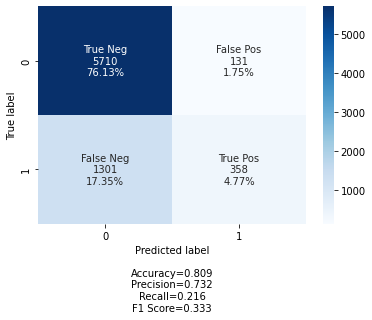

In [79]:
# code from class
# Show the confusion matrix
cf = metrics.confusion_matrix(Ys_test['X'],y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [80]:
def run_LR(X_train, X_test, y_train, y_test, cf_title=None):
    """Function to run Linear Regression and present results"""
    # code from class
    # Create object and train the model
    classModel = LogisticRegression(random_state=123, max_iter=300)
    classModel.fit(X_train, y_train)
    # predict y for X_train and X_test
    y_pred_train = classModel.predict(X_train) 
    y_pred_test = classModel.predict(X_test) 
    # code from class
    # Show the confusion matrix
    cf = metrics.confusion_matrix(y_test,y_pred_test)
    labels = ['True Neg','False Pos','False Neg','True Pos']
    categories = ['0', '1']
    make_confusion_matrix(cf, 
                          group_names=labels,
                          categories=categories, 
                          cmap='Blues',
                          title=cf_title
                         )
    display(performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test))
    
    return classModel # return classification object

In [81]:
# drop ID from X and add it as a different df in the dfs norm dictionary
dfs_norm['X_a'] = dfs_norm['X'].drop(columns="ID")
dfs_norm['X_a'].head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   0.010101  1.0   0.333333  0.333333  0.051724    0.4    0.4    0.1    0.1   
1   0.111111  1.0   0.333333  0.666667  0.086207    0.1    0.4    0.2    0.2   
2   0.080808  1.0   0.333333  0.666667  0.224138    0.2    0.2    0.2    0.2   
3   0.040404  1.0   0.333333  0.333333  0.275862    0.2    0.2    0.2    0.2   
4   0.040404  0.0   0.333333  0.333333  0.620690    0.1    0.2    0.1    0.2   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0    0.0  ...   0.086723   0.160138   0.080648   0.260979  0.000000  0.000409   
1    0.2  ...   0.087817   0.163220   0.084074   0.263485  0.000000  0.000594   
2    0.2  ...   0.093789   0.173637   0.095470   0.272928  0.001738  0.000891   
3    0.2  ...   0.113407   0.186809   0.109363   0.283685  0.002290  0.001199   
4    0.2  ...   0.106020   0.179863   0.099633   0.275681  0.002290  0.021779   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0  0.000000  0.000000  0.000000  0.000000  
1  0.001116  0.001610  0.000000  0.003783  
2  0.001116  0.001610  0.002345  0.009458  
3  0.001339  0.001771  0.002506  0.001892  
4  0.011160  0.014493  0.001615  0.001284  

[5 rows x 23 columns]

In [82]:
# define Y for new X_a df
Ys['X_a'] = Ys['X'].copy() # Y is the same as X

Measure     Train      Test
0   ACCURACY  0.808933  0.809333
1  PRECISION  0.714557  0.734151
2     RECALL  0.226843  0.216395
3   F1 SCORE  0.344365  0.334264
4        AUC  0.600553  0.597069

LogisticRegression(max_iter=300, random_state=123)

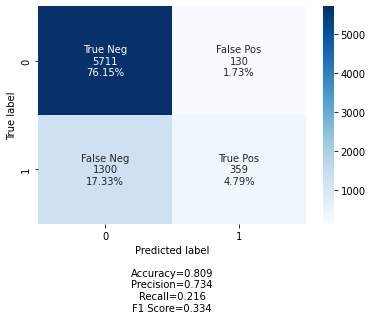

In [83]:
run_LR(*train_test_split(dfs_norm['X_a'], Ys['X_a'], 
                         test_size=0.25, stratify=Ys['X_a'], random_state=123))

Observations:
- Removing the ID variable does not have any meaningful impact on the performance of the model (in fact it improved very marginally, with one observation moving from False Positives to True Negatives, and Precision increasing by 0.001)
- This confimrs the fact that ID variable is not helping anything in terms of the model's predictions

X


Measure     Train      Test
0   ACCURACY  0.808889  0.809067
1  PRECISION  0.714105  0.732106
2     RECALL  0.226843  0.215793
3   F1 SCORE  0.344312  0.333333
4        AUC  0.600524  0.596682

X_DP


Measure     Train      Test
0   ACCURACY  0.821200  0.822133
1  PRECISION  0.681369  0.692764
2     RECALL  0.360056  0.352019
3   F1 SCORE  0.471145  0.466827
4        AUC  0.656117  0.653839

X_DPNO


Measure     Train      Test
0   ACCURACY  0.818231  0.815933
1  PRECISION  0.689545  0.678107
2     RECALL  0.371373  0.369439
3   F1 SCORE  0.482749  0.478297
4        AUC  0.660940  0.658765

X_A


Measure     Train      Test
0   ACCURACY  0.808933  0.809333
1  PRECISION  0.714557  0.734151
2     RECALL  0.226843  0.216395
3   F1 SCORE  0.344365  0.334264
4        AUC  0.600553  0.597069

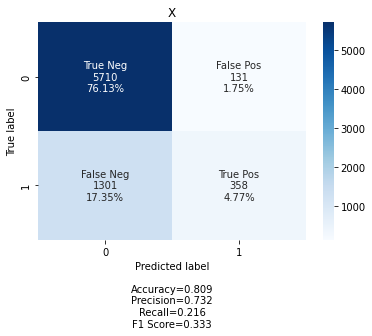

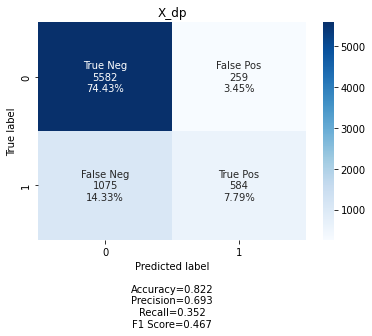

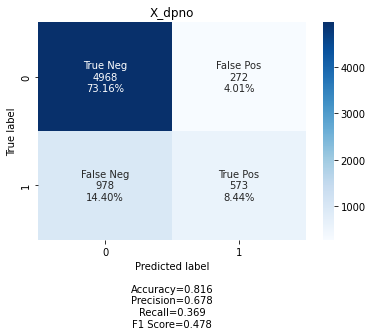

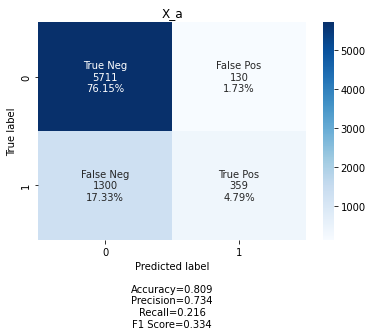

In [84]:
# We'll now run the Logistic regression for the remaining dfs in the normalized dfs dictionary
for df_name, df in dfs_norm.items():
    print(df_name.upper())
    run_LR(*train_test_split(dfs_norm[df_name], Ys[df_name], # Y is the same as X
                                                test_size=0.25, stratify=Ys[df_name], random_state=123), cf_title=df_name)

In [85]:
# We'll now drop the ID variables from all dfs we are using
dfs_norm.pop('X_a') # delete X_a from dictionary, since it will be the new X in dictionry of normalized dfs (dfs_norm)
for df_name, df in dfs_norm.items():
    dfs_norm[df_name] = df.drop(columns="ID")
    print(df_name, 'ID removed: ', 'ID' not in dfs_norm[df_name].columns)

X ID removed:  True
X_dp ID removed:  True
X_dpno ID removed:  True


X


Measure     Train      Test
0   ACCURACY  0.808933  0.809333
1  PRECISION  0.714557  0.734151
2     RECALL  0.226843  0.216395
3   F1 SCORE  0.344365  0.334264
4        AUC  0.600553  0.597069

X_DP


Measure     Train      Test
0   ACCURACY  0.821378  0.822000
1  PRECISION  0.682129  0.691943
2     RECALL  0.360458  0.352019
3   F1 SCORE  0.471671  0.466640
4        AUC  0.656375  0.653753

X_DPNO


Measure     Train      Test
0   ACCURACY  0.818427  0.815933
1  PRECISION  0.690495  0.678529
2     RECALL  0.371588  0.368794
3   F1 SCORE  0.483163  0.477861
4        AUC  0.661142  0.658538

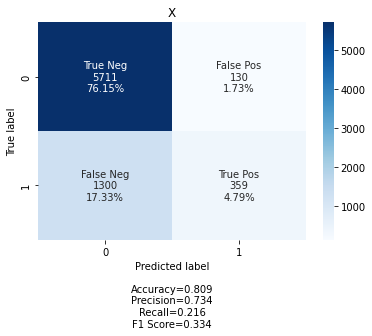

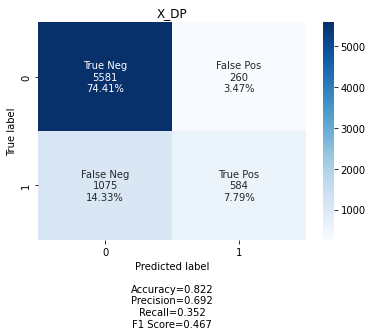

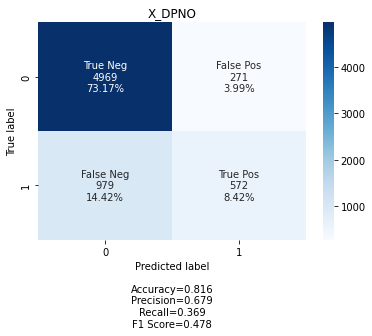

In [86]:
lr_objs = {} # dictionary to store classification objects
# rerun the model for all dfs now without ID
dfs_train, dfs_test, Ys_train, Ys_test = split_dfs(dfs_norm)
for df_name, df in dfs_norm.items():
    print(df_name.upper())
    lr_objs[df_name] = run_LR(*train_test_split(dfs_norm[df_name], Ys[df_name], # Y is the same as X
                                                test_size=0.25, stratify=Ys[df_name], random_state=123), cf_title=df_name.upper())

Observations:
- Accuracy of the model is not bad (~82%), but we have to take into account that the dataset is not balanced because it has 78% of non default (zero) and only 22% of defaults (Y=1).
- Precision is moderately high at 69%, which means 69% of cases the model is predicting to default actually default.
- However, recall is low at 35%, which means the model is only predicting 35% of the actual defaults. We need to improve this metric in order to have a better model, since unpredicted defaults can lead to unexpected losses and the more defaults we can predict, the better our model and the better our risk measurement.

(TO DO): Comment which is the better model (see question of outliers first).

#### (TO DO) Applying over and under sampling

#### Plot ROC Curve

In [87]:
from yellowbrick.classifier import ROCAUC

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


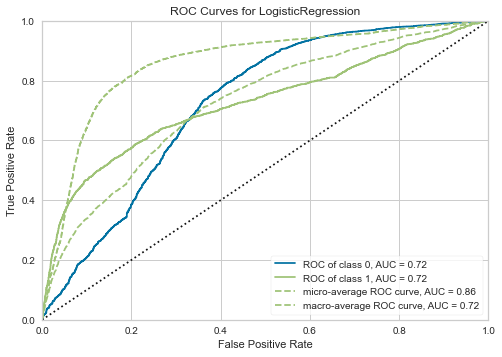

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


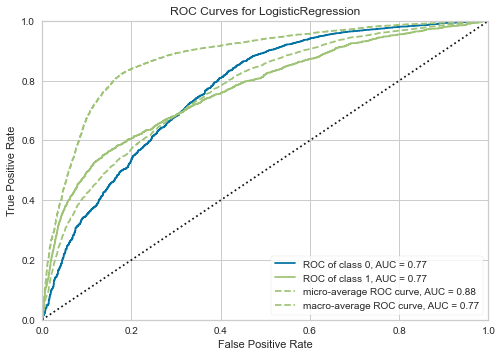

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


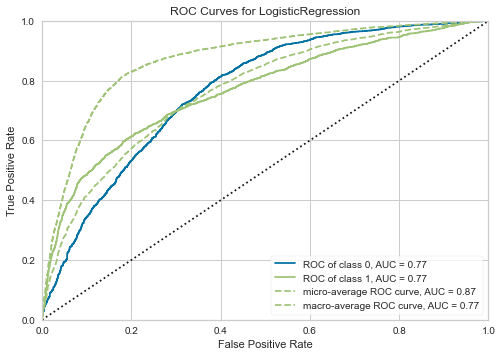

In [88]:
# ROC curve
# adapted from code from class
for df_name, df in dfs_norm.items():
    visualizer = ROCAUC(lr_objs[df_name], classes=['0','1'])
    visualizer.fit(dfs_train[df_name], Ys_train[df_name])
    visualizer.score(dfs_test[df_name], Ys_test[df_name])
    visualizer.show()

#### Plot Precision-Recall Curve

In [89]:
from yellowbrick.classifier import PrecisionRecallCurve

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


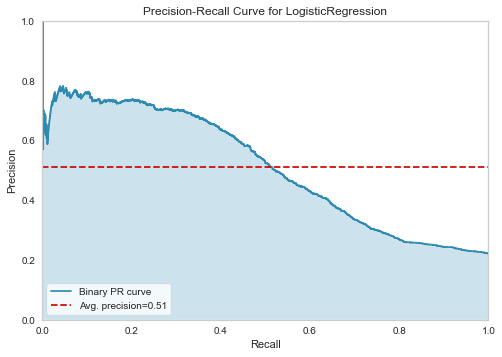

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


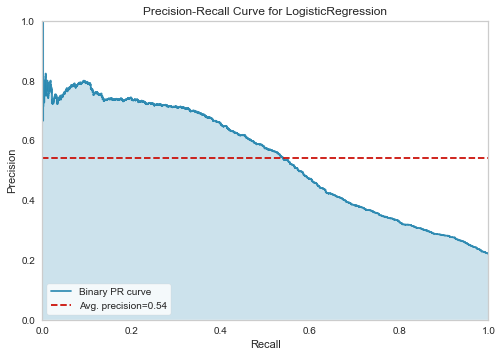

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


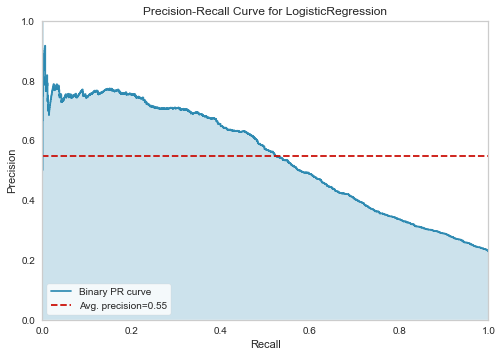

In [90]:
# Precison-Recall curve
# adapted from code from class
for df_name, df in dfs_norm.items():
    visualizer = PrecisionRecallCurve(lr_objs[df_name], classes=['0','1'])
    visualizer.fit(dfs_train[df_name], Ys_train[df_name])
    visualizer.score(dfs_test[df_name], Ys_test[df_name])
    visualizer.show()